In [5]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np
import itertools
import csv

In [9]:
df = pd.read_csv("breast_numerical.csv", sep=',')

In [10]:
data = df.iloc[:,1:10]
labels = df.iloc[:,0]

In [11]:
kf = KFold(n_splits=2, shuffle=True) #5 fores me 2 folds

In [12]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

### Euclidean metric and k tuning

                      precision    recall  f1-score   support

   recurrence-events       0.79      0.78      0.78        98
no-recurrence-events       0.33      0.35      0.34        31

           micro avg       0.67      0.67      0.67       129
           macro avg       0.56      0.57      0.56       129
        weighted avg       0.68      0.67      0.68       129

accuracy:  0.6744186046511628


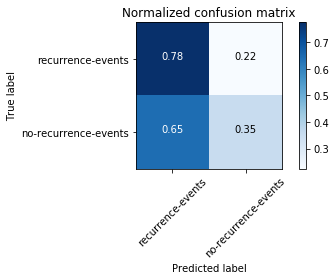

                      precision    recall  f1-score   support

   recurrence-events       0.71      0.81      0.76        86
no-recurrence-events       0.47      0.33      0.38        43

           micro avg       0.65      0.65      0.65       129
           macro avg       0.59      0.57      0.57       129
        weighted avg       0.63      0.65      0.63       129

accuracy:  0.6511627906976745


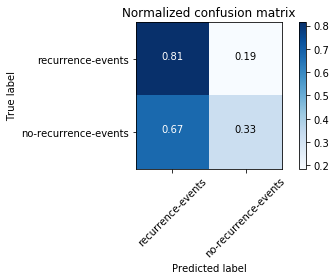

                      precision    recall  f1-score   support

   recurrence-events       0.71      0.84      0.77        91
no-recurrence-events       0.32      0.18      0.23        38

           micro avg       0.64      0.64      0.64       129
           macro avg       0.51      0.51      0.50       129
        weighted avg       0.59      0.64      0.61       129

accuracy:  0.6434108527131783


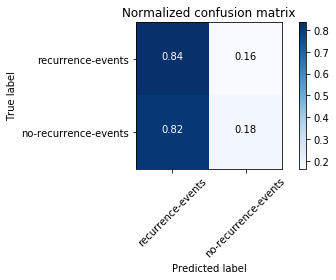

                      precision    recall  f1-score   support

   recurrence-events       0.74      0.83      0.78        93
no-recurrence-events       0.36      0.25      0.30        36

           micro avg       0.67      0.67      0.67       129
           macro avg       0.55      0.54      0.54       129
        weighted avg       0.63      0.67      0.65       129

accuracy:  0.6666666666666666


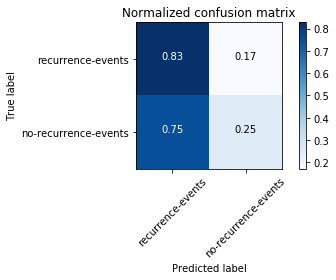

                      precision    recall  f1-score   support

   recurrence-events       0.78      0.78      0.78        97
no-recurrence-events       0.34      0.34      0.34        32

           micro avg       0.67      0.67      0.67       129
           macro avg       0.56      0.56      0.56       129
        weighted avg       0.67      0.67      0.67       129

accuracy:  0.6744186046511628


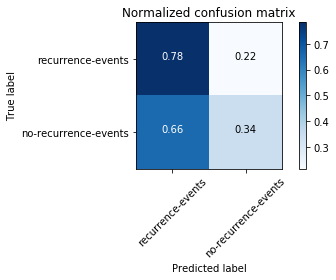

                      precision    recall  f1-score   support

   recurrence-events       0.73      0.84      0.78        87
no-recurrence-events       0.52      0.36      0.42        42

           micro avg       0.68      0.68      0.68       129
           macro avg       0.62      0.60      0.60       129
        weighted avg       0.66      0.68      0.66       129

accuracy:  0.6821705426356589


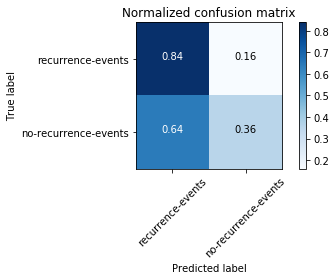

                      precision    recall  f1-score   support

   recurrence-events       0.78      0.77      0.78        97
no-recurrence-events       0.33      0.34      0.34        32

           micro avg       0.67      0.67      0.67       129
           macro avg       0.56      0.56      0.56       129
        weighted avg       0.67      0.67      0.67       129

accuracy:  0.6666666666666666


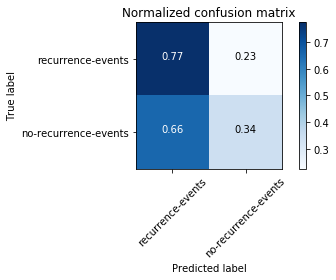

                      precision    recall  f1-score   support

   recurrence-events       0.71      0.80      0.76        87
no-recurrence-events       0.45      0.33      0.38        42

           micro avg       0.65      0.65      0.65       129
           macro avg       0.58      0.57      0.57       129
        weighted avg       0.63      0.65      0.64       129

accuracy:  0.6511627906976745


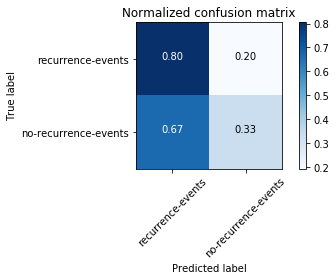

                      precision    recall  f1-score   support

   recurrence-events       0.74      0.84      0.79        89
no-recurrence-events       0.48      0.33      0.39        40

           micro avg       0.68      0.68      0.68       129
           macro avg       0.61      0.58      0.59       129
        weighted avg       0.66      0.68      0.66       129

accuracy:  0.6821705426356589


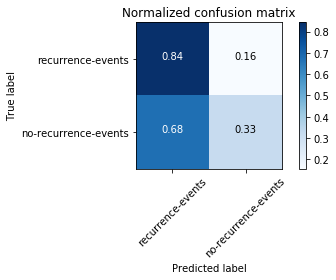

                      precision    recall  f1-score   support

   recurrence-events       0.76      0.68      0.72        95
no-recurrence-events       0.30      0.38      0.34        34

           micro avg       0.60      0.60      0.60       129
           macro avg       0.53      0.53      0.53       129
        weighted avg       0.64      0.60      0.62       129

accuracy:  0.6046511627906976


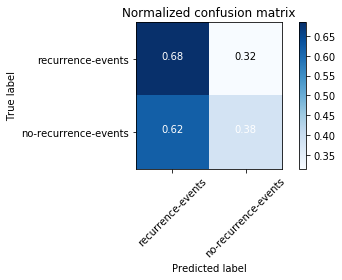

In [13]:
acc =[]
acc.append("Euclidean 1")
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=1, algorithm = 'auto', metric = 'euclidean')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            #print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        print "accuracy: ", accuracy_score(y_test, predicted)
        acc.append(accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

                      precision    recall  f1-score   support

   recurrence-events       0.73      0.90      0.81        89
no-recurrence-events       0.55      0.28      0.37        40

           micro avg       0.71      0.71      0.71       129
           macro avg       0.64      0.59      0.59       129
        weighted avg       0.68      0.71      0.67       129

accuracy:  0.7054263565891473


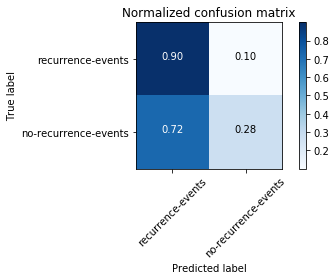

                      precision    recall  f1-score   support

   recurrence-events       0.75      0.79      0.77        95
no-recurrence-events       0.31      0.26      0.29        34

           micro avg       0.65      0.65      0.65       129
           macro avg       0.53      0.53      0.53       129
        weighted avg       0.63      0.65      0.64       129

accuracy:  0.6511627906976745


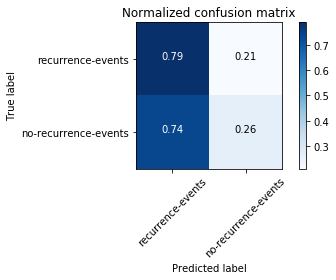

                      precision    recall  f1-score   support

   recurrence-events       0.75      0.93      0.83        92
no-recurrence-events       0.60      0.24      0.35        37

           micro avg       0.74      0.74      0.74       129
           macro avg       0.68      0.59      0.59       129
        weighted avg       0.71      0.74      0.69       129

accuracy:  0.7364341085271318


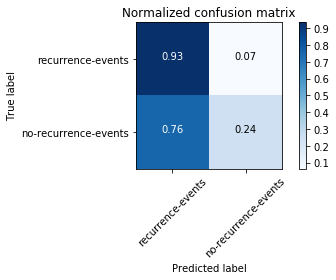

                      precision    recall  f1-score   support

   recurrence-events       0.74      0.90      0.81        92
no-recurrence-events       0.47      0.22      0.30        37

           micro avg       0.71      0.71      0.71       129
           macro avg       0.61      0.56      0.56       129
        weighted avg       0.66      0.71      0.67       129

accuracy:  0.7054263565891473


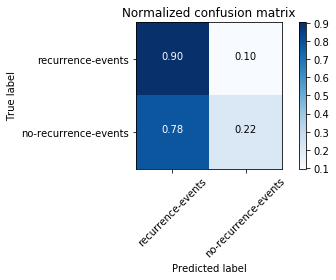

                      precision    recall  f1-score   support

   recurrence-events       0.72      0.95      0.82        87
no-recurrence-events       0.69      0.21      0.33        42

           micro avg       0.71      0.71      0.71       129
           macro avg       0.70      0.58      0.57       129
        weighted avg       0.71      0.71      0.66       129

accuracy:  0.7131782945736435


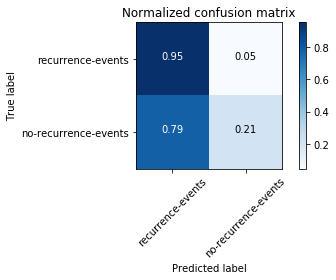

                      precision    recall  f1-score   support

   recurrence-events       0.79      0.82      0.81        97
no-recurrence-events       0.39      0.34      0.37        32

           micro avg       0.71      0.71      0.71       129
           macro avg       0.59      0.58      0.59       129
        weighted avg       0.69      0.71      0.70       129

accuracy:  0.7054263565891473


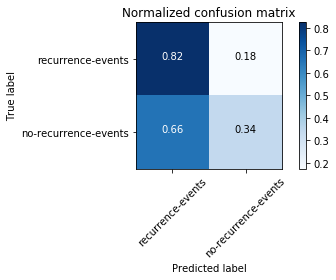

                      precision    recall  f1-score   support

   recurrence-events       0.76      0.90      0.82        91
no-recurrence-events       0.57      0.32      0.41        38

           micro avg       0.73      0.73      0.73       129
           macro avg       0.67      0.61      0.62       129
        weighted avg       0.70      0.73      0.70       129

accuracy:  0.7286821705426356


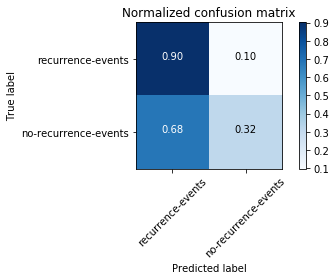

                      precision    recall  f1-score   support

   recurrence-events       0.75      0.86      0.80        93
no-recurrence-events       0.43      0.28      0.34        36

           micro avg       0.70      0.70      0.70       129
           macro avg       0.59      0.57      0.57       129
        weighted avg       0.67      0.70      0.67       129

accuracy:  0.6976744186046512


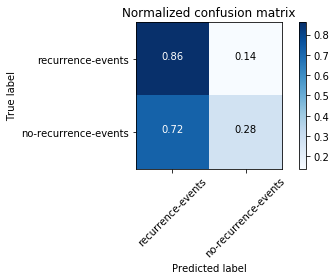

                      precision    recall  f1-score   support

   recurrence-events       0.77      0.94      0.85        90
no-recurrence-events       0.74      0.36      0.48        39

           micro avg       0.77      0.77      0.77       129
           macro avg       0.75      0.65      0.67       129
        weighted avg       0.76      0.77      0.74       129

accuracy:  0.7674418604651163


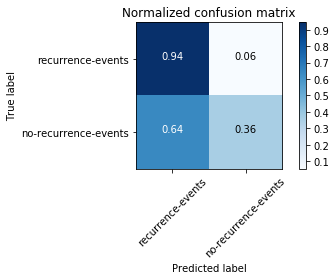

                      precision    recall  f1-score   support

   recurrence-events       0.76      0.90      0.83        94
no-recurrence-events       0.47      0.23      0.31        35

           micro avg       0.72      0.72      0.72       129
           macro avg       0.61      0.57      0.57       129
        weighted avg       0.68      0.72      0.68       129

accuracy:  0.7209302325581395


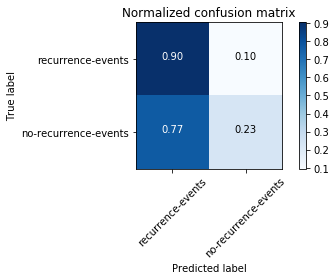

In [14]:
acc.append("Euclidean 5")
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=5, algorithm = 'auto', metric = 'euclidean')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            #print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        print "accuracy: ", accuracy_score(y_test, predicted)
        acc.append(accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

                      precision    recall  f1-score   support

   recurrence-events       0.75      0.92      0.83        93
no-recurrence-events       0.53      0.22      0.31        36

           micro avg       0.73      0.73      0.73       129
           macro avg       0.64      0.57      0.57       129
        weighted avg       0.69      0.73      0.69       129

accuracy:  0.7286821705426356


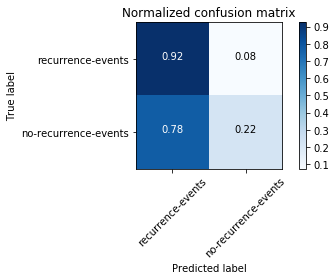

                      precision    recall  f1-score   support

   recurrence-events       0.71      0.97      0.82        91
no-recurrence-events       0.40      0.05      0.09        38

           micro avg       0.70      0.70      0.70       129
           macro avg       0.55      0.51      0.46       129
        weighted avg       0.62      0.70      0.60       129

accuracy:  0.6976744186046512


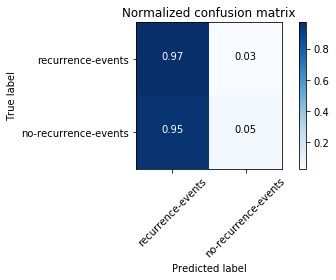

                      precision    recall  f1-score   support

   recurrence-events       0.73      0.93      0.82        92
no-recurrence-events       0.45      0.14      0.21        37

           micro avg       0.71      0.71      0.71       129
           macro avg       0.59      0.53      0.51       129
        weighted avg       0.65      0.71      0.64       129

accuracy:  0.7054263565891473


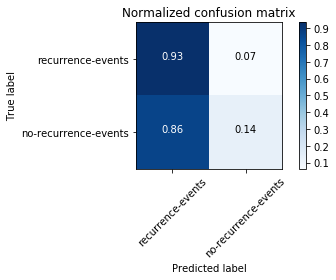

                      precision    recall  f1-score   support

   recurrence-events       0.73      0.97      0.83        92
no-recurrence-events       0.57      0.11      0.18        37

           micro avg       0.72      0.72      0.72       129
           macro avg       0.65      0.54      0.51       129
        weighted avg       0.68      0.72      0.65       129

accuracy:  0.7209302325581395


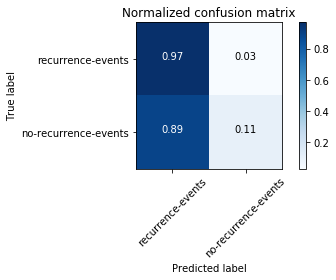

                      precision    recall  f1-score   support

   recurrence-events       0.73      0.93      0.82        90
no-recurrence-events       0.57      0.21      0.30        39

           micro avg       0.71      0.71      0.71       129
           macro avg       0.65      0.57      0.56       129
        weighted avg       0.68      0.71      0.66       129

accuracy:  0.7131782945736435


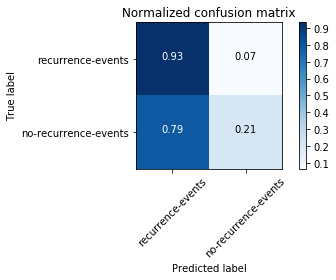

                      precision    recall  f1-score   support

   recurrence-events       0.75      0.95      0.84        94
no-recurrence-events       0.50      0.14      0.22        35

           micro avg       0.73      0.73      0.73       129
           macro avg       0.62      0.54      0.53       129
        weighted avg       0.68      0.73      0.67       129

accuracy:  0.7286821705426356


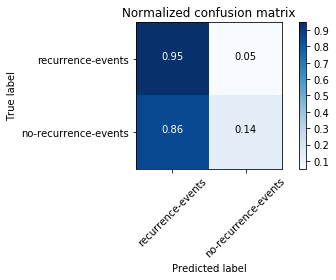

                      precision    recall  f1-score   support

   recurrence-events       0.79      0.93      0.85        95
no-recurrence-events       0.59      0.29      0.39        34

           micro avg       0.76      0.76      0.76       129
           macro avg       0.69      0.61      0.62       129
        weighted avg       0.73      0.76      0.73       129

accuracy:  0.7596899224806202


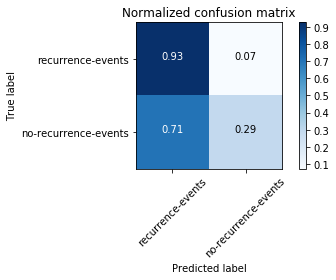

                      precision    recall  f1-score   support

   recurrence-events       0.70      0.91      0.79        89
no-recurrence-events       0.38      0.12      0.19        40

           micro avg       0.67      0.67      0.67       129
           macro avg       0.54      0.52      0.49       129
        weighted avg       0.60      0.67      0.60       129

accuracy:  0.6666666666666666


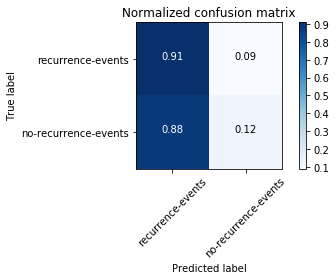

                      precision    recall  f1-score   support

   recurrence-events       0.77      0.98      0.86        93
no-recurrence-events       0.82      0.25      0.38        36

           micro avg       0.78      0.78      0.78       129
           macro avg       0.79      0.61      0.62       129
        weighted avg       0.78      0.78      0.73       129

accuracy:  0.7751937984496124


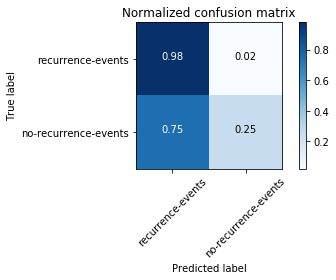

                      precision    recall  f1-score   support

   recurrence-events       0.74      0.93      0.83        91
no-recurrence-events       0.57      0.21      0.31        38

           micro avg       0.72      0.72      0.72       129
           macro avg       0.66      0.57      0.57       129
        weighted avg       0.69      0.72      0.67       129

accuracy:  0.7209302325581395


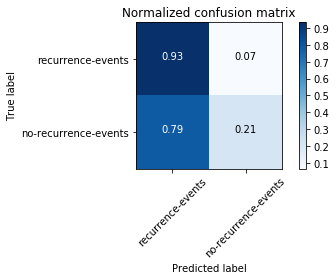

In [15]:
acc.append("Euclidean 10")
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=10, algorithm = 'auto', metric = 'euclidean')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        print "accuracy: ", accuracy_score(y_test, predicted)
        acc.append(accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

set(['recurrence-events', 'no-recurrence-events'])
                      precision    recall  f1-score   support

   recurrence-events       0.74      0.94      0.83        90
no-recurrence-events       0.64      0.23      0.34        39

           micro avg       0.73      0.73      0.73       129
           macro avg       0.69      0.59      0.58       129
        weighted avg       0.71      0.73      0.68       129

accuracy:  0.7286821705426356


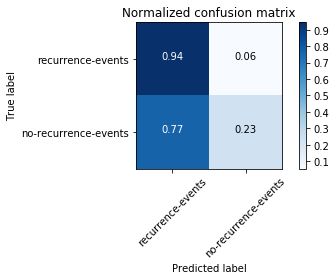

set(['recurrence-events', 'no-recurrence-events'])
                      precision    recall  f1-score   support

   recurrence-events       0.77      0.94      0.85        94
no-recurrence-events       0.60      0.26      0.36        35

           micro avg       0.75      0.75      0.75       129
           macro avg       0.69      0.60      0.60       129
        weighted avg       0.73      0.75      0.71       129

accuracy:  0.751937984496124


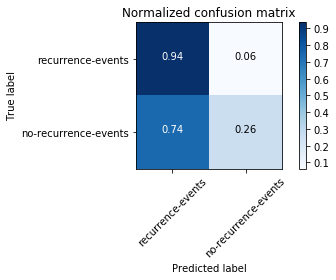

set(['recurrence-events', 'no-recurrence-events'])
                      precision    recall  f1-score   support

   recurrence-events       0.75      0.95      0.83        93
no-recurrence-events       0.55      0.17      0.26        36

           micro avg       0.73      0.73      0.73       129
           macro avg       0.65      0.56      0.54       129
        weighted avg       0.69      0.73      0.67       129

accuracy:  0.7286821705426356


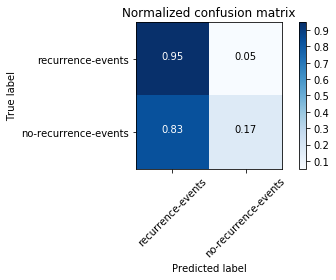

set(['recurrence-events', 'no-recurrence-events'])
                      precision    recall  f1-score   support

   recurrence-events       0.74      0.98      0.84        91
no-recurrence-events       0.78      0.18      0.30        38

           micro avg       0.74      0.74      0.74       129
           macro avg       0.76      0.58      0.57       129
        weighted avg       0.75      0.74      0.68       129

accuracy:  0.7441860465116279


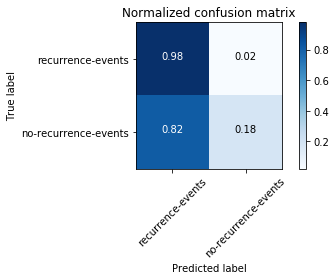

set(['recurrence-events', 'no-recurrence-events'])
                      precision    recall  f1-score   support

   recurrence-events       0.75      0.99      0.85        92
no-recurrence-events       0.88      0.19      0.31        37

           micro avg       0.76      0.76      0.76       129
           macro avg       0.81      0.59      0.58       129
        weighted avg       0.79      0.76      0.70       129

accuracy:  0.7596899224806202


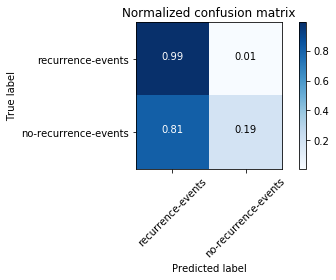

set(['recurrence-events', 'no-recurrence-events'])
                      precision    recall  f1-score   support

   recurrence-events       0.76      0.93      0.84        92
no-recurrence-events       0.62      0.27      0.38        37

           micro avg       0.74      0.74      0.74       129
           macro avg       0.69      0.60      0.61       129
        weighted avg       0.72      0.74      0.71       129

accuracy:  0.7441860465116279


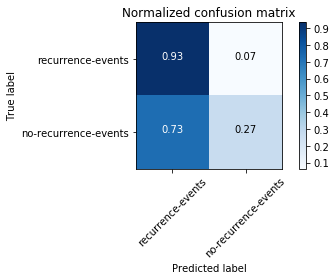

set(['recurrence-events', 'no-recurrence-events'])
                      precision    recall  f1-score   support

   recurrence-events       0.81      0.93      0.86        99
no-recurrence-events       0.53      0.27      0.36        30

           micro avg       0.78      0.78      0.78       129
           macro avg       0.67      0.60      0.61       129
        weighted avg       0.74      0.78      0.75       129

accuracy:  0.7751937984496124


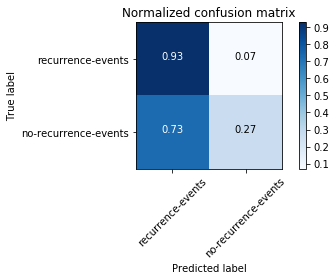

set(['recurrence-events', 'no-recurrence-events'])
                      precision    recall  f1-score   support

   recurrence-events       0.67      0.95      0.79        85
no-recurrence-events       0.50      0.09      0.15        44

           micro avg       0.66      0.66      0.66       129
           macro avg       0.58      0.52      0.47       129
        weighted avg       0.61      0.66      0.57       129

accuracy:  0.6589147286821705


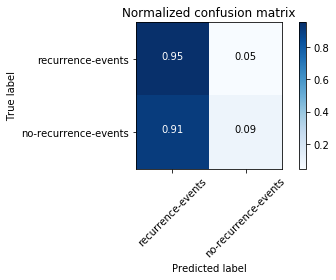

set(['recurrence-events', 'no-recurrence-events'])
                      precision    recall  f1-score   support

   recurrence-events       0.74      0.95      0.83        93
no-recurrence-events       0.50      0.14      0.22        36

           micro avg       0.72      0.72      0.72       129
           macro avg       0.62      0.54      0.52       129
        weighted avg       0.67      0.72      0.66       129

accuracy:  0.7209302325581395


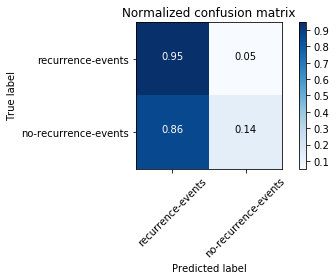

set(['recurrence-events', 'no-recurrence-events'])
                      precision    recall  f1-score   support

   recurrence-events       0.75      0.95      0.84        91
no-recurrence-events       0.67      0.26      0.38        38

           micro avg       0.74      0.74      0.74       129
           macro avg       0.71      0.60      0.61       129
        weighted avg       0.73      0.74      0.70       129

accuracy:  0.7441860465116279


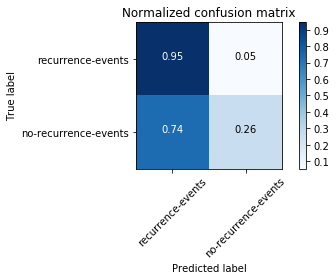

In [16]:
acc.append("Euclidean 15")
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=15, algorithm = 'auto', metric = 'euclidean')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        print "accuracy: ", accuracy_score(y_test, predicted)
        acc.append(accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

                      precision    recall  f1-score   support

   recurrence-events       0.76      0.97      0.85        94
no-recurrence-events       0.67      0.17      0.27        35

           micro avg       0.75      0.75      0.75       129
           macro avg       0.71      0.57      0.56       129
        weighted avg       0.73      0.75      0.69       129

accuracy:  0.751937984496124


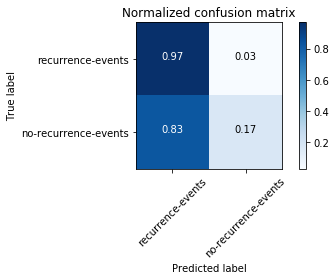

                      precision    recall  f1-score   support

   recurrence-events       0.71      1.00      0.83        90
no-recurrence-events       1.00      0.05      0.10        39

           micro avg       0.71      0.71      0.71       129
           macro avg       0.85      0.53      0.46       129
        weighted avg       0.80      0.71      0.61       129

accuracy:  0.7131782945736435


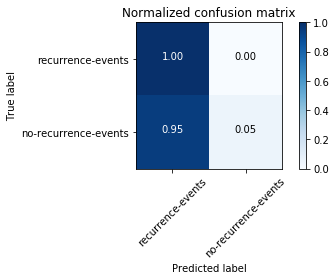

                      precision    recall  f1-score   support

   recurrence-events       0.71      0.97      0.82        89
no-recurrence-events       0.62      0.12      0.21        40

           micro avg       0.71      0.71      0.71       129
           macro avg       0.67      0.55      0.51       129
        weighted avg       0.68      0.71      0.63       129

accuracy:  0.7054263565891473


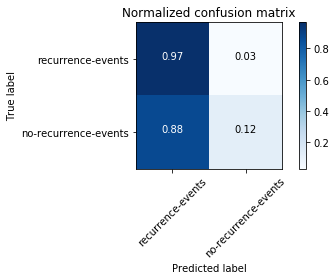

                      precision    recall  f1-score   support

   recurrence-events       0.79      0.94      0.86        95
no-recurrence-events       0.62      0.29      0.40        34

           micro avg       0.77      0.77      0.77       129
           macro avg       0.71      0.62      0.63       129
        weighted avg       0.74      0.77      0.74       129

accuracy:  0.7674418604651163


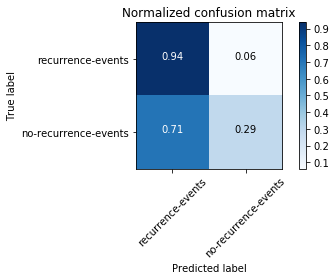

                      precision    recall  f1-score   support

   recurrence-events       0.69      0.98      0.81        87
no-recurrence-events       0.67      0.10      0.17        42

           micro avg       0.69      0.69      0.69       129
           macro avg       0.68      0.54      0.49       129
        weighted avg       0.68      0.69      0.60       129

accuracy:  0.689922480620155


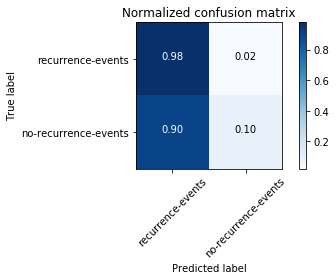

                      precision    recall  f1-score   support

   recurrence-events       0.81      0.98      0.88        97
no-recurrence-events       0.82      0.28      0.42        32

           micro avg       0.81      0.81      0.81       129
           macro avg       0.81      0.63      0.65       129
        weighted avg       0.81      0.81      0.77       129

accuracy:  0.8062015503875969


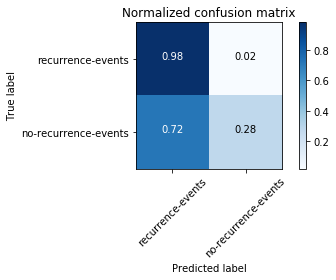

                      precision    recall  f1-score   support

   recurrence-events       0.74      0.98      0.84        93
no-recurrence-events       0.67      0.11      0.19        36

           micro avg       0.74      0.74      0.74       129
           macro avg       0.70      0.54      0.52       129
        weighted avg       0.72      0.74      0.66       129

accuracy:  0.7364341085271318


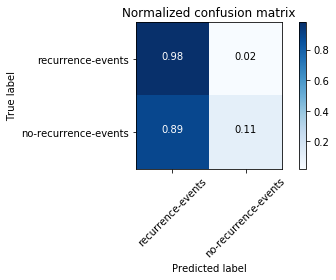

                      precision    recall  f1-score   support

   recurrence-events       0.73      0.99      0.84        91
no-recurrence-events       0.83      0.13      0.23        38

           micro avg       0.74      0.74      0.74       129
           macro avg       0.78      0.56      0.53       129
        weighted avg       0.76      0.74      0.66       129

accuracy:  0.7364341085271318


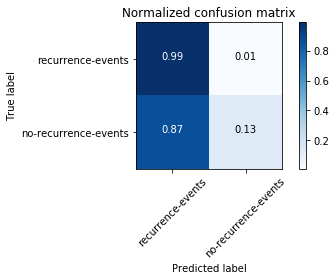

                      precision    recall  f1-score   support

   recurrence-events       0.70      0.98      0.82        90
no-recurrence-events       0.50      0.05      0.09        39

           micro avg       0.70      0.70      0.70       129
           macro avg       0.60      0.51      0.46       129
        weighted avg       0.64      0.70      0.60       129

accuracy:  0.6976744186046512


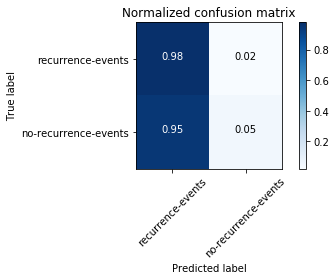

                      precision    recall  f1-score   support

   recurrence-events       0.79      0.94      0.86        94
no-recurrence-events       0.67      0.34      0.45        35

           micro avg       0.78      0.78      0.78       129
           macro avg       0.73      0.64      0.66       129
        weighted avg       0.76      0.78      0.75       129

accuracy:  0.7751937984496124


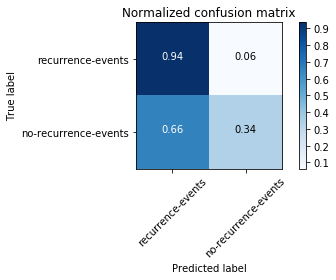

In [17]:
acc.append("Euclidean 20")
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=20, algorithm = 'auto', metric = 'euclidean')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        print "accuracy: ", accuracy_score(y_test, predicted)
        acc.append(accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

                      precision    recall  f1-score   support

   recurrence-events       0.71      1.00      0.83        87
no-recurrence-events       1.00      0.14      0.25        42

           micro avg       0.72      0.72      0.72       129
           macro avg       0.85      0.57      0.54       129
        weighted avg       0.80      0.72      0.64       129

accuracy:  0.7209302325581395


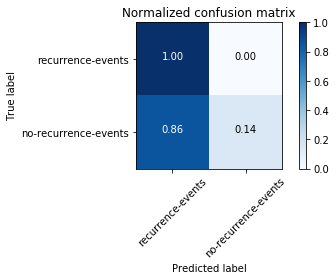

                      precision    recall  f1-score   support

   recurrence-events       0.78      0.99      0.87        97
no-recurrence-events       0.83      0.16      0.26        32

           micro avg       0.78      0.78      0.78       129
           macro avg       0.81      0.57      0.57       129
        weighted avg       0.79      0.78      0.72       129

accuracy:  0.7829457364341085


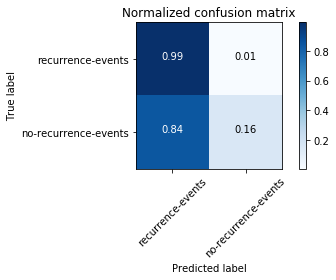

                      precision    recall  f1-score   support

   recurrence-events       0.73      1.00      0.85        91
no-recurrence-events       1.00      0.13      0.23        38

           micro avg       0.74      0.74      0.74       129
           macro avg       0.87      0.57      0.54       129
        weighted avg       0.81      0.74      0.67       129

accuracy:  0.7441860465116279


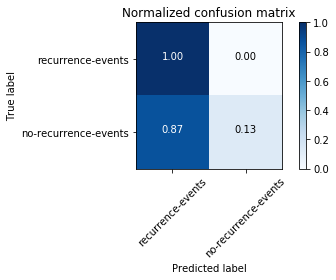

                      precision    recall  f1-score   support

   recurrence-events       0.74      0.97      0.84        93
no-recurrence-events       0.62      0.14      0.23        36

           micro avg       0.74      0.74      0.74       129
           macro avg       0.68      0.55      0.53       129
        weighted avg       0.71      0.74      0.67       129

accuracy:  0.7364341085271318


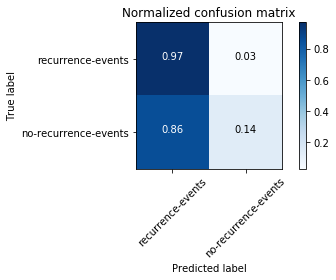

                      precision    recall  f1-score   support

   recurrence-events       0.75      0.99      0.85        92
no-recurrence-events       0.86      0.16      0.27        37

           micro avg       0.75      0.75      0.75       129
           macro avg       0.80      0.58      0.56       129
        weighted avg       0.78      0.75      0.68       129

accuracy:  0.751937984496124


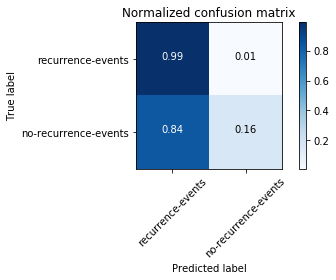

/home/valia/.local/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


                      precision    recall  f1-score   support

   recurrence-events       0.71      1.00      0.83        92
no-recurrence-events       0.00      0.00      0.00        37

           micro avg       0.71      0.71      0.71       129
           macro avg       0.36      0.50      0.42       129
        weighted avg       0.51      0.71      0.59       129

accuracy:  0.7131782945736435


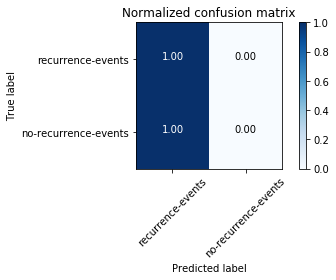

                      precision    recall  f1-score   support

   recurrence-events       0.76      0.99      0.86        95
no-recurrence-events       0.83      0.15      0.25        34

           micro avg       0.77      0.77      0.77       129
           macro avg       0.80      0.57      0.56       129
        weighted avg       0.78      0.77      0.70       129

accuracy:  0.7674418604651163


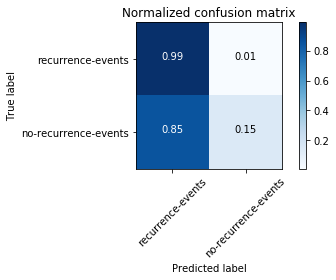

                      precision    recall  f1-score   support

   recurrence-events       0.70      0.99      0.82        89
no-recurrence-events       0.67      0.05      0.09        40

           micro avg       0.70      0.70      0.70       129
           macro avg       0.68      0.52      0.46       129
        weighted avg       0.69      0.70      0.59       129

accuracy:  0.6976744186046512


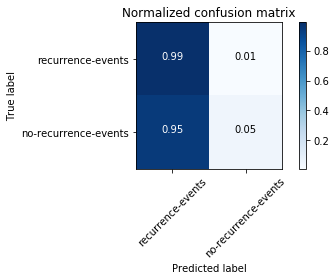

                      precision    recall  f1-score   support

   recurrence-events       0.72      1.00      0.83        91
no-recurrence-events       1.00      0.05      0.10        38

           micro avg       0.72      0.72      0.72       129
           macro avg       0.86      0.53      0.47       129
        weighted avg       0.80      0.72      0.62       129

accuracy:  0.7209302325581395


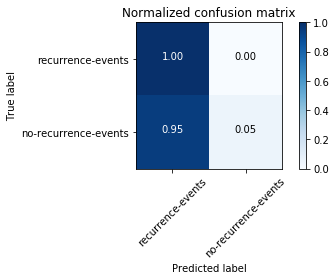

                      precision    recall  f1-score   support

   recurrence-events       0.76      0.99      0.86        93
no-recurrence-events       0.88      0.19      0.32        36

           micro avg       0.77      0.77      0.77       129
           macro avg       0.82      0.59      0.59       129
        weighted avg       0.79      0.77      0.71       129

accuracy:  0.7674418604651163


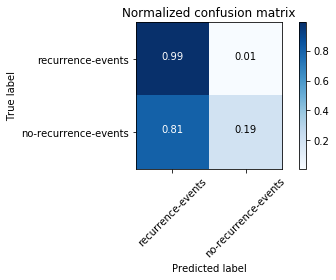

In [18]:
acc.append("Euclidean 30")
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=30, algorithm = 'auto', metric = 'euclidean')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        print "accuracy: ", accuracy_score(y_test, predicted)
        acc.append(accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

set(['recurrence-events', 'no-recurrence-events'])
                      precision    recall  f1-score   support

   recurrence-events       0.73      1.00      0.85        94
no-recurrence-events       1.00      0.03      0.06        35

           micro avg       0.74      0.74      0.74       129
           macro avg       0.87      0.51      0.45       129
        weighted avg       0.81      0.74      0.63       129

accuracy:  0.7364341085271318


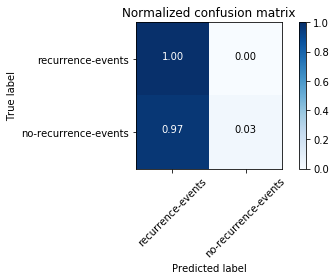

                      precision    recall  f1-score   support

   recurrence-events       0.70      1.00      0.82        90
no-recurrence-events       0.00      0.00      0.00        39

           micro avg       0.70      0.70      0.70       129
           macro avg       0.35      0.50      0.41       129
        weighted avg       0.49      0.70      0.57       129

accuracy:  0.6976744186046512


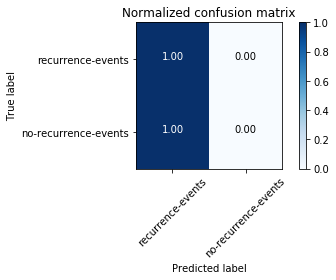

                      precision    recall  f1-score   support

   recurrence-events       0.71      1.00      0.83        92
no-recurrence-events       0.00      0.00      0.00        37

           micro avg       0.71      0.71      0.71       129
           macro avg       0.36      0.50      0.42       129
        weighted avg       0.51      0.71      0.59       129

accuracy:  0.7131782945736435


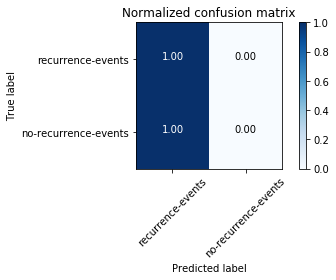

                      precision    recall  f1-score   support

   recurrence-events       0.71      1.00      0.83        92
no-recurrence-events       0.00      0.00      0.00        37

           micro avg       0.71      0.71      0.71       129
           macro avg       0.36      0.50      0.42       129
        weighted avg       0.51      0.71      0.59       129

accuracy:  0.7131782945736435


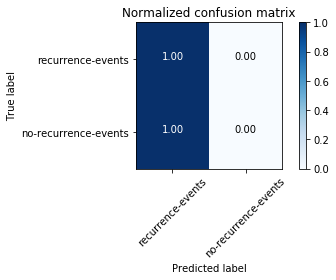

                      precision    recall  f1-score   support

   recurrence-events       0.75      1.00      0.86        97
no-recurrence-events       0.00      0.00      0.00        32

           micro avg       0.75      0.75      0.75       129
           macro avg       0.38      0.50      0.43       129
        weighted avg       0.57      0.75      0.65       129

accuracy:  0.751937984496124


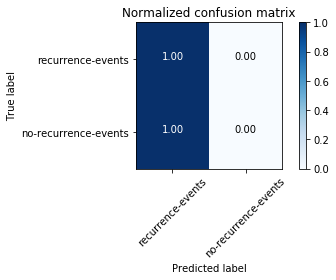

                      precision    recall  f1-score   support

   recurrence-events       0.67      1.00      0.81        87
no-recurrence-events       0.00      0.00      0.00        42

           micro avg       0.67      0.67      0.67       129
           macro avg       0.34      0.50      0.40       129
        weighted avg       0.45      0.67      0.54       129

accuracy:  0.6744186046511628


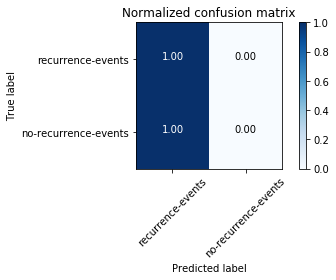

                      precision    recall  f1-score   support

   recurrence-events       0.69      1.00      0.82        89
no-recurrence-events       0.00      0.00      0.00        40

           micro avg       0.69      0.69      0.69       129
           macro avg       0.34      0.50      0.41       129
        weighted avg       0.48      0.69      0.56       129

accuracy:  0.689922480620155


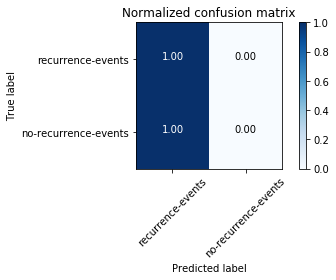

set(['recurrence-events', 'no-recurrence-events'])
                      precision    recall  f1-score   support

   recurrence-events       0.74      1.00      0.85        95
no-recurrence-events       1.00      0.03      0.06        34

           micro avg       0.74      0.74      0.74       129
           macro avg       0.87      0.51      0.45       129
        weighted avg       0.81      0.74      0.64       129

accuracy:  0.7441860465116279


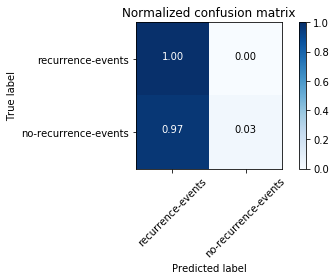

                      precision    recall  f1-score   support

   recurrence-events       0.67      1.00      0.80        86
no-recurrence-events       0.00      0.00      0.00        43

           micro avg       0.67      0.67      0.67       129
           macro avg       0.33      0.50      0.40       129
        weighted avg       0.44      0.67      0.53       129

accuracy:  0.6666666666666666


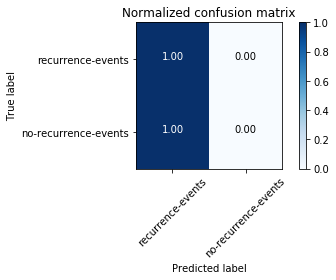

set(['recurrence-events', 'no-recurrence-events'])
                      precision    recall  f1-score   support

   recurrence-events       0.77      1.00      0.87        98
no-recurrence-events       1.00      0.03      0.06        31

           micro avg       0.77      0.77      0.77       129
           macro avg       0.88      0.52      0.46       129
        weighted avg       0.82      0.77      0.67       129

accuracy:  0.7674418604651163


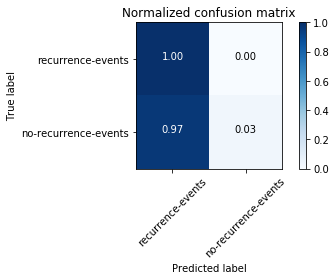

In [19]:
acc.append("Euclidean 50")
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=50, algorithm = 'auto', metric = 'euclidean')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        print "accuracy: ", accuracy_score(y_test, predicted)
        acc.append(accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

                      precision    recall  f1-score   support

   recurrence-events       0.69      1.00      0.82        89
no-recurrence-events       0.00      0.00      0.00        40

           micro avg       0.69      0.69      0.69       129
           macro avg       0.34      0.50      0.41       129
        weighted avg       0.48      0.69      0.56       129

accuracy:  0.689922480620155


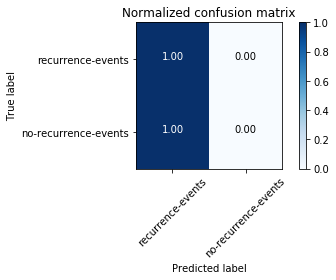

                      precision    recall  f1-score   support

   recurrence-events       0.74      1.00      0.85        95
no-recurrence-events       0.00      0.00      0.00        34

           micro avg       0.74      0.74      0.74       129
           macro avg       0.37      0.50      0.42       129
        weighted avg       0.54      0.74      0.62       129

accuracy:  0.7364341085271318


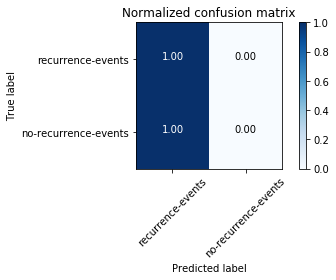

                      precision    recall  f1-score   support

   recurrence-events       0.72      1.00      0.84        93
no-recurrence-events       0.00      0.00      0.00        36

           micro avg       0.72      0.72      0.72       129
           macro avg       0.36      0.50      0.42       129
        weighted avg       0.52      0.72      0.60       129

accuracy:  0.7209302325581395


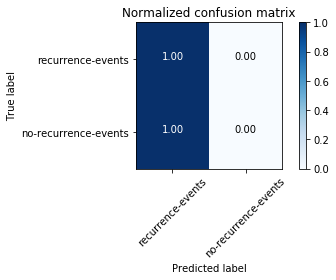

                      precision    recall  f1-score   support

   recurrence-events       0.71      1.00      0.83        91
no-recurrence-events       0.00      0.00      0.00        38

           micro avg       0.71      0.71      0.71       129
           macro avg       0.35      0.50      0.41       129
        weighted avg       0.50      0.71      0.58       129

accuracy:  0.7054263565891473


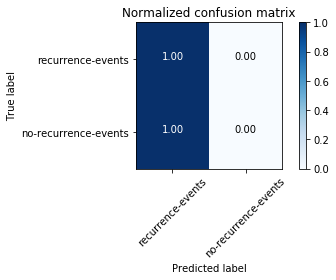

                      precision    recall  f1-score   support

   recurrence-events       0.68      1.00      0.81        88
no-recurrence-events       0.00      0.00      0.00        41

           micro avg       0.68      0.68      0.68       129
           macro avg       0.34      0.50      0.41       129
        weighted avg       0.47      0.68      0.55       129

accuracy:  0.6821705426356589


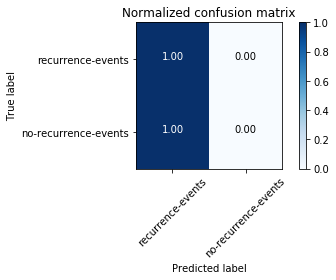

                      precision    recall  f1-score   support

   recurrence-events       0.74      1.00      0.85        96
no-recurrence-events       0.00      0.00      0.00        33

           micro avg       0.74      0.74      0.74       129
           macro avg       0.37      0.50      0.43       129
        weighted avg       0.55      0.74      0.64       129

accuracy:  0.7441860465116279


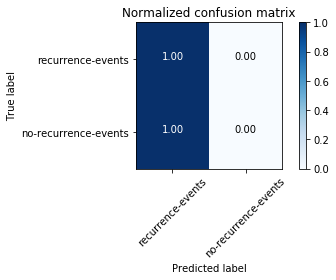

                      precision    recall  f1-score   support

   recurrence-events       0.73      1.00      0.84        94
no-recurrence-events       0.00      0.00      0.00        35

           micro avg       0.73      0.73      0.73       129
           macro avg       0.36      0.50      0.42       129
        weighted avg       0.53      0.73      0.61       129

accuracy:  0.7286821705426356


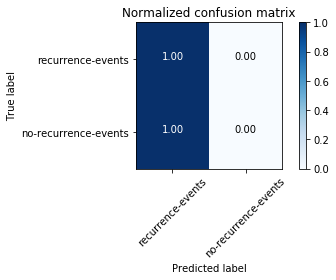

                      precision    recall  f1-score   support

   recurrence-events       0.70      1.00      0.82        90
no-recurrence-events       0.00      0.00      0.00        39

           micro avg       0.70      0.70      0.70       129
           macro avg       0.35      0.50      0.41       129
        weighted avg       0.49      0.70      0.57       129

accuracy:  0.6976744186046512


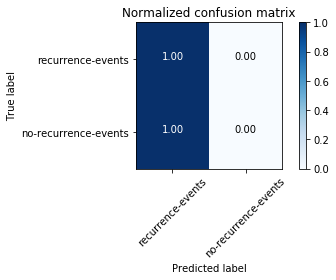

                      precision    recall  f1-score   support

   recurrence-events       0.68      1.00      0.81        88
no-recurrence-events       0.00      0.00      0.00        41

           micro avg       0.68      0.68      0.68       129
           macro avg       0.34      0.50      0.41       129
        weighted avg       0.47      0.68      0.55       129

accuracy:  0.6821705426356589


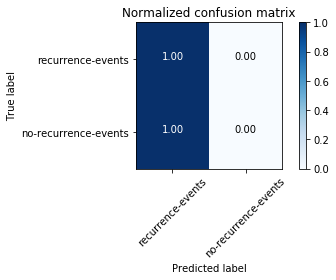

                      precision    recall  f1-score   support

   recurrence-events       0.74      1.00      0.85        96
no-recurrence-events       0.00      0.00      0.00        33

           micro avg       0.74      0.74      0.74       129
           macro avg       0.37      0.50      0.43       129
        weighted avg       0.55      0.74      0.64       129

accuracy:  0.7441860465116279


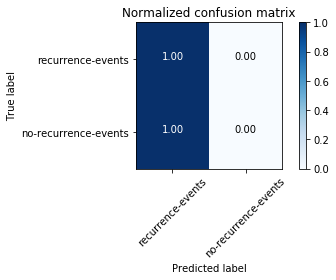

In [20]:
acc.append("Euclidean 100")
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=100, algorithm = 'auto', metric = 'euclidean')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        print "accuracy: ", accuracy_score(y_test, predicted)
        acc.append(accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

### Minkowski metric and k tunning

set(['recurrence-events', 'no-recurrence-events'])
                      precision    recall  f1-score   support

   recurrence-events       0.83      0.71      0.77       101
no-recurrence-events       0.31      0.46      0.37        28

           micro avg       0.66      0.66      0.66       129
           macro avg       0.57      0.59      0.57       129
        weighted avg       0.72      0.66      0.68       129

accuracy:  0.6589147286821705


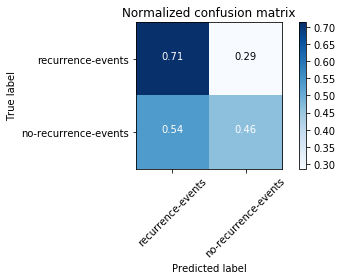

set(['recurrence-events', 'no-recurrence-events'])
                      precision    recall  f1-score   support

   recurrence-events       0.71      0.78      0.74        83
no-recurrence-events       0.51      0.41      0.46        46

           micro avg       0.65      0.65      0.65       129
           macro avg       0.61      0.60      0.60       129
        weighted avg       0.64      0.65      0.64       129

accuracy:  0.6511627906976745


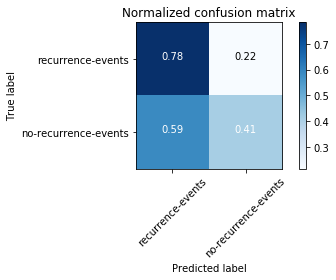

set(['recurrence-events', 'no-recurrence-events'])
                      precision    recall  f1-score   support

   recurrence-events       0.74      0.78      0.76        91
no-recurrence-events       0.39      0.34      0.37        38

           micro avg       0.65      0.65      0.65       129
           macro avg       0.57      0.56      0.56       129
        weighted avg       0.64      0.65      0.64       129

accuracy:  0.6511627906976745


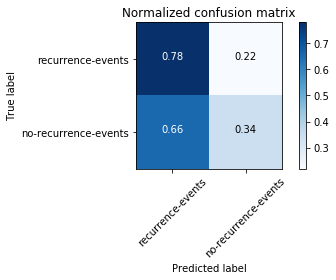

set(['recurrence-events', 'no-recurrence-events'])
                      precision    recall  f1-score   support

   recurrence-events       0.76      0.81      0.78        93
no-recurrence-events       0.40      0.33      0.36        36

           micro avg       0.67      0.67      0.67       129
           macro avg       0.58      0.57      0.57       129
        weighted avg       0.66      0.67      0.66       129

accuracy:  0.6744186046511628


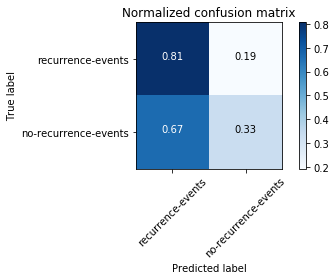

set(['recurrence-events', 'no-recurrence-events'])
                      precision    recall  f1-score   support

   recurrence-events       0.78      0.80      0.79        95
no-recurrence-events       0.41      0.38      0.39        34

           micro avg       0.69      0.69      0.69       129
           macro avg       0.59      0.59      0.59       129
        weighted avg       0.68      0.69      0.69       129

accuracy:  0.689922480620155


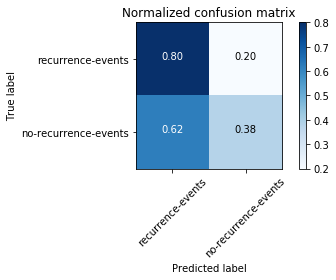

set(['recurrence-events', 'no-recurrence-events'])
                      precision    recall  f1-score   support

   recurrence-events       0.72      0.81      0.76        89
no-recurrence-events       0.41      0.30      0.35        40

           micro avg       0.65      0.65      0.65       129
           macro avg       0.57      0.55      0.55       129
        weighted avg       0.63      0.65      0.63       129

accuracy:  0.6511627906976745


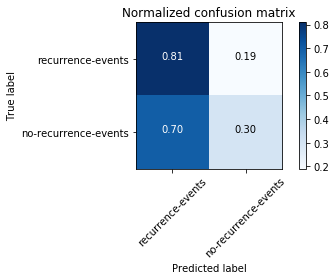

set(['recurrence-events', 'no-recurrence-events'])
                      precision    recall  f1-score   support

   recurrence-events       0.69      0.76      0.72        90
no-recurrence-events       0.29      0.23      0.26        39

           micro avg       0.60      0.60      0.60       129
           macro avg       0.49      0.49      0.49       129
        weighted avg       0.57      0.60      0.58       129

accuracy:  0.5968992248062015


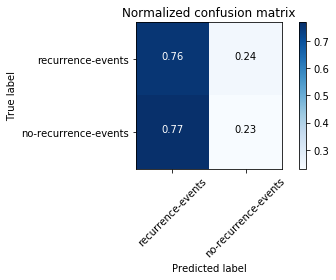

set(['recurrence-events', 'no-recurrence-events'])
                      precision    recall  f1-score   support

   recurrence-events       0.77      0.78      0.77        94
no-recurrence-events       0.38      0.37      0.38        35

           micro avg       0.67      0.67      0.67       129
           macro avg       0.58      0.57      0.57       129
        weighted avg       0.66      0.67      0.67       129

accuracy:  0.6666666666666666


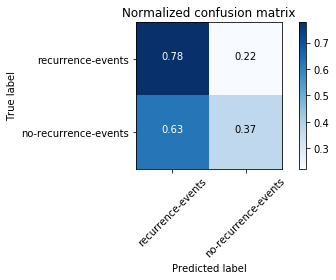

set(['recurrence-events', 'no-recurrence-events'])
                      precision    recall  f1-score   support

   recurrence-events       0.75      0.76      0.75        94
no-recurrence-events       0.32      0.31      0.32        35

           micro avg       0.64      0.64      0.64       129
           macro avg       0.54      0.53      0.54       129
        weighted avg       0.63      0.64      0.63       129

accuracy:  0.6356589147286822


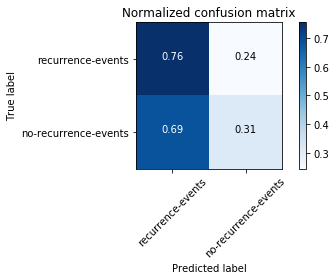

set(['recurrence-events', 'no-recurrence-events'])
                      precision    recall  f1-score   support

   recurrence-events       0.71      0.82      0.76        90
no-recurrence-events       0.36      0.23      0.28        39

           micro avg       0.64      0.64      0.64       129
           macro avg       0.54      0.53      0.52       129
        weighted avg       0.61      0.64      0.62       129

accuracy:  0.6434108527131783


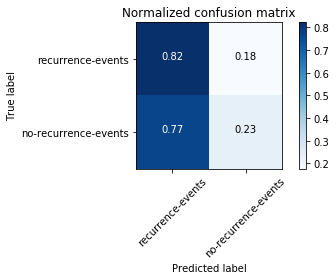

In [21]:
acc.append("Minkowski 1")
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=1, algorithm = 'auto', metric = 'minkowski')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        print "accuracy: ", accuracy_score(y_test, predicted)
        acc.append(accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

set(['recurrence-events', 'no-recurrence-events'])
                      precision    recall  f1-score   support

   recurrence-events       0.72      0.92      0.81        88
no-recurrence-events       0.59      0.24      0.34        41

           micro avg       0.71      0.71      0.71       129
           macro avg       0.66      0.58      0.58       129
        weighted avg       0.68      0.71      0.66       129

accuracy:  0.7054263565891473


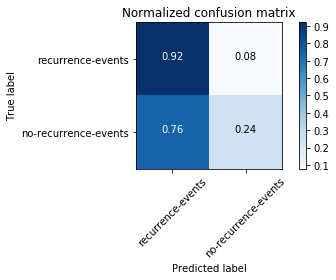

set(['recurrence-events', 'no-recurrence-events'])
                      precision    recall  f1-score   support

   recurrence-events       0.79      0.90      0.84        96
no-recurrence-events       0.50      0.30      0.38        33

           micro avg       0.74      0.74      0.74       129
           macro avg       0.64      0.60      0.61       129
        weighted avg       0.72      0.74      0.72       129

accuracy:  0.7441860465116279


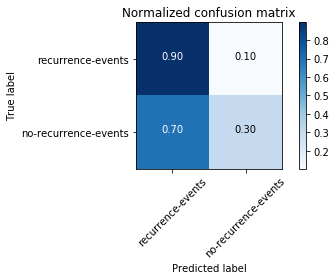

set(['recurrence-events', 'no-recurrence-events'])
                      precision    recall  f1-score   support

   recurrence-events       0.77      0.91      0.83        93
no-recurrence-events       0.56      0.28      0.37        36

           micro avg       0.74      0.74      0.74       129
           macro avg       0.66      0.60      0.60       129
        weighted avg       0.71      0.74      0.70       129

accuracy:  0.7364341085271318


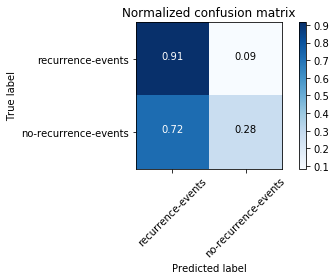

set(['recurrence-events', 'no-recurrence-events'])
                      precision    recall  f1-score   support

   recurrence-events       0.73      0.92      0.82        91
no-recurrence-events       0.50      0.18      0.27        38

           micro avg       0.71      0.71      0.71       129
           macro avg       0.62      0.55      0.54       129
        weighted avg       0.66      0.71      0.65       129

accuracy:  0.7054263565891473


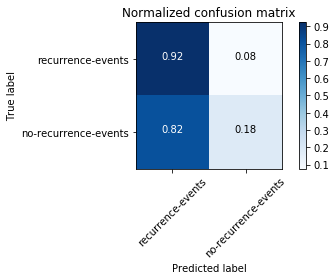

set(['recurrence-events', 'no-recurrence-events'])
                      precision    recall  f1-score   support

   recurrence-events       0.74      0.84      0.79        92
no-recurrence-events       0.40      0.27      0.32        37

           micro avg       0.67      0.67      0.67       129
           macro avg       0.57      0.55      0.55       129
        weighted avg       0.64      0.67      0.65       129

accuracy:  0.6744186046511628


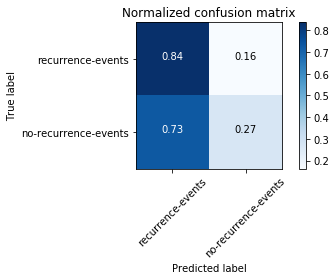

set(['recurrence-events', 'no-recurrence-events'])
                      precision    recall  f1-score   support

   recurrence-events       0.76      0.98      0.85        92
no-recurrence-events       0.80      0.22      0.34        37

           micro avg       0.76      0.76      0.76       129
           macro avg       0.78      0.60      0.60       129
        weighted avg       0.77      0.76      0.71       129

accuracy:  0.7596899224806202


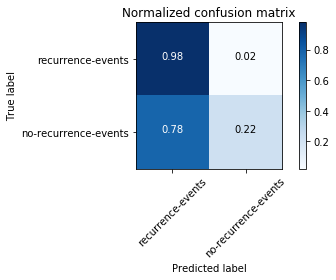

set(['recurrence-events', 'no-recurrence-events'])
                      precision    recall  f1-score   support

   recurrence-events       0.72      0.85      0.78        87
no-recurrence-events       0.50      0.31      0.38        42

           micro avg       0.67      0.67      0.67       129
           macro avg       0.61      0.58      0.58       129
        weighted avg       0.65      0.67      0.65       129

accuracy:  0.6744186046511628


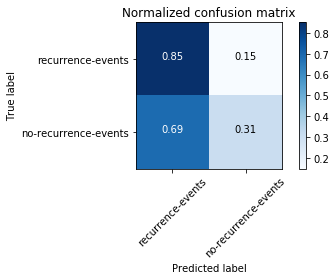

set(['recurrence-events', 'no-recurrence-events'])
                      precision    recall  f1-score   support

   recurrence-events       0.75      0.76      0.76        97
no-recurrence-events       0.23      0.22      0.23        32

           micro avg       0.63      0.63      0.63       129
           macro avg       0.49      0.49      0.49       129
        weighted avg       0.62      0.63      0.62       129

accuracy:  0.627906976744186


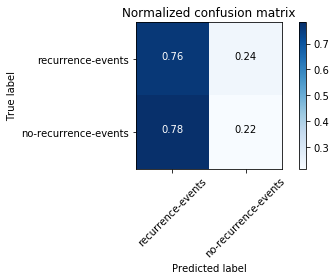

set(['recurrence-events', 'no-recurrence-events'])
                      precision    recall  f1-score   support

   recurrence-events       0.73      0.88      0.80        94
no-recurrence-events       0.31      0.14      0.20        35

           micro avg       0.68      0.68      0.68       129
           macro avg       0.52      0.51      0.50       129
        weighted avg       0.62      0.68      0.64       129

accuracy:  0.6821705426356589


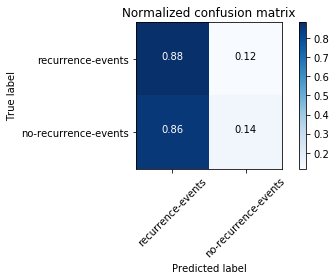

set(['recurrence-events', 'no-recurrence-events'])
                      precision    recall  f1-score   support

   recurrence-events       0.75      0.86      0.80        90
no-recurrence-events       0.50      0.33      0.40        39

           micro avg       0.70      0.70      0.70       129
           macro avg       0.62      0.59      0.60       129
        weighted avg       0.67      0.70      0.68       129

accuracy:  0.6976744186046512


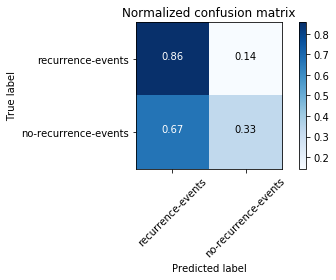

In [22]:
acc.append("Minkowski 5")
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=5, algorithm = 'auto', metric = 'minkowski')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        print "accuracy: ", accuracy_score(y_test, predicted)
        acc.append(accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

                      precision    recall  f1-score   support

   recurrence-events       0.74      0.93      0.83        91
no-recurrence-events       0.57      0.21      0.31        38

           micro avg       0.72      0.72      0.72       129
           macro avg       0.66      0.57      0.57       129
        weighted avg       0.69      0.72      0.67       129

accuracy:  0.7209302325581395


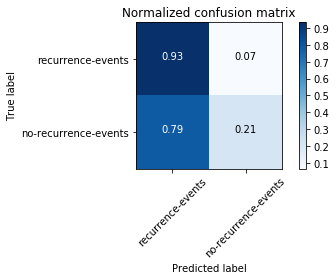

                      precision    recall  f1-score   support

   recurrence-events       0.77      0.97      0.86        93
no-recurrence-events       0.75      0.25      0.38        36

           micro avg       0.77      0.77      0.77       129
           macro avg       0.76      0.61      0.62       129
        weighted avg       0.76      0.77      0.72       129

accuracy:  0.7674418604651163


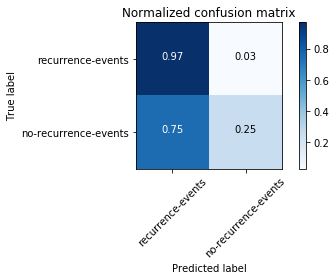

                      precision    recall  f1-score   support

   recurrence-events       0.75      0.90      0.82        91
no-recurrence-events       0.55      0.29      0.38        38

           micro avg       0.72      0.72      0.72       129
           macro avg       0.65      0.60      0.60       129
        weighted avg       0.69      0.72      0.69       129

accuracy:  0.7209302325581395


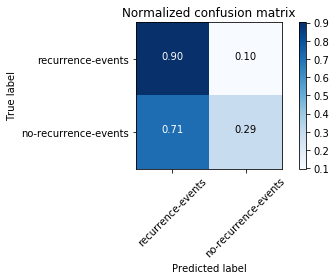

                      precision    recall  f1-score   support

   recurrence-events       0.73      0.99      0.84        93
no-recurrence-events       0.67      0.06      0.10        36

           micro avg       0.73      0.73      0.73       129
           macro avg       0.70      0.52      0.47       129
        weighted avg       0.71      0.73      0.63       129

accuracy:  0.7286821705426356


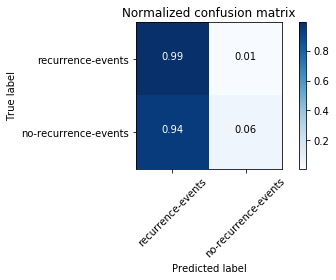

                      precision    recall  f1-score   support

   recurrence-events       0.72      0.95      0.82        88
no-recurrence-events       0.67      0.20      0.30        41

           micro avg       0.71      0.71      0.71       129
           macro avg       0.69      0.57      0.56       129
        weighted avg       0.70      0.71      0.65       129

accuracy:  0.7131782945736435


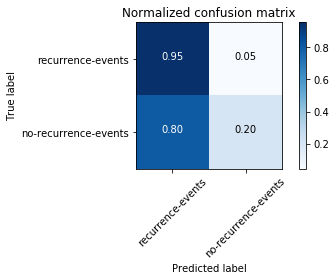

                      precision    recall  f1-score   support

   recurrence-events       0.75      0.96      0.84        96
no-recurrence-events       0.43      0.09      0.15        33

           micro avg       0.74      0.74      0.74       129
           macro avg       0.59      0.52      0.50       129
        weighted avg       0.67      0.74      0.67       129

accuracy:  0.7364341085271318


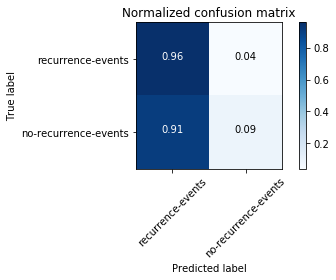

                      precision    recall  f1-score   support

   recurrence-events       0.77      0.94      0.84        93
no-recurrence-events       0.62      0.28      0.38        36

           micro avg       0.75      0.75      0.75       129
           macro avg       0.70      0.61      0.61       129
        weighted avg       0.73      0.75      0.72       129

accuracy:  0.751937984496124


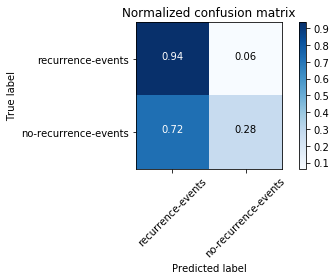

                      precision    recall  f1-score   support

   recurrence-events       0.74      0.96      0.84        91
no-recurrence-events       0.67      0.21      0.32        38

           micro avg       0.74      0.74      0.74       129
           macro avg       0.71      0.58      0.58       129
        weighted avg       0.72      0.74      0.68       129

accuracy:  0.7364341085271318


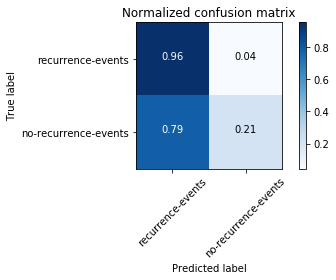

                      precision    recall  f1-score   support

   recurrence-events       0.75      0.97      0.85        92
no-recurrence-events       0.73      0.22      0.33        37

           micro avg       0.75      0.75      0.75       129
           macro avg       0.74      0.59      0.59       129
        weighted avg       0.75      0.75      0.70       129

accuracy:  0.751937984496124


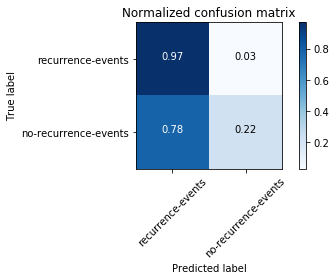

                      precision    recall  f1-score   support

   recurrence-events       0.74      0.98      0.85        92
no-recurrence-events       0.75      0.16      0.27        37

           micro avg       0.74      0.74      0.74       129
           macro avg       0.75      0.57      0.56       129
        weighted avg       0.75      0.74      0.68       129

accuracy:  0.7441860465116279


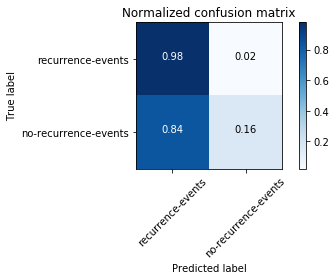

In [23]:
acc.append("Minkowski 10")
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=10, algorithm = 'auto', metric = 'minkowski')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        print "accuracy: ", accuracy_score(y_test, predicted)
        acc.append(accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

set(['recurrence-events', 'no-recurrence-events'])
                      precision    recall  f1-score   support

   recurrence-events       0.74      0.91      0.82        91
no-recurrence-events       0.53      0.24      0.33        38

           micro avg       0.71      0.71      0.71       129
           macro avg       0.64      0.57      0.57       129
        weighted avg       0.68      0.71      0.67       129

accuracy:  0.7131782945736435


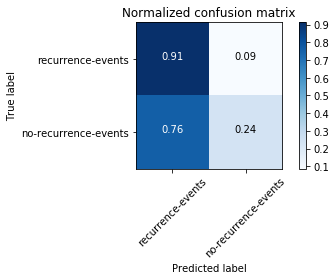

set(['recurrence-events', 'no-recurrence-events'])
                      precision    recall  f1-score   support

   recurrence-events       0.73      0.91      0.81        93
no-recurrence-events       0.33      0.11      0.17        36

           micro avg       0.69      0.69      0.69       129
           macro avg       0.53      0.51      0.49       129
        weighted avg       0.62      0.69      0.63       129

accuracy:  0.689922480620155


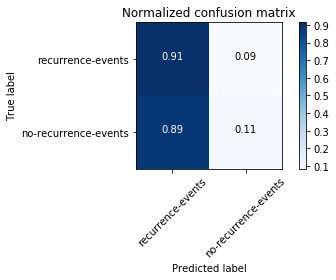

set(['recurrence-events', 'no-recurrence-events'])
                      precision    recall  f1-score   support

   recurrence-events       0.87      0.89      0.88       101
no-recurrence-events       0.58      0.54      0.56        28

           micro avg       0.81      0.81      0.81       129
           macro avg       0.73      0.71      0.72       129
        weighted avg       0.81      0.81      0.81       129

accuracy:  0.813953488372093


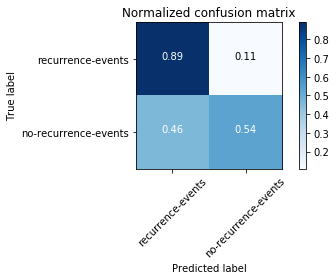

set(['recurrence-events', 'no-recurrence-events'])
                      precision    recall  f1-score   support

   recurrence-events       0.65      0.98      0.78        83
no-recurrence-events       0.60      0.07      0.12        46

           micro avg       0.65      0.65      0.65       129
           macro avg       0.63      0.52      0.45       129
        weighted avg       0.63      0.65      0.55       129

accuracy:  0.6511627906976745


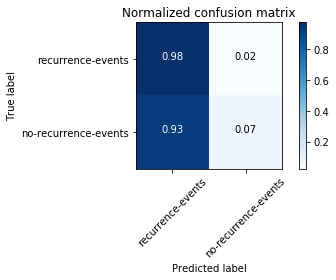

set(['recurrence-events', 'no-recurrence-events'])
                      precision    recall  f1-score   support

   recurrence-events       0.79      0.91      0.85        98
no-recurrence-events       0.47      0.26      0.33        31

           micro avg       0.75      0.75      0.75       129
           macro avg       0.63      0.58      0.59       129
        weighted avg       0.72      0.75      0.72       129

accuracy:  0.751937984496124


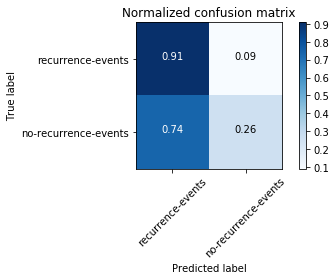

set(['recurrence-events', 'no-recurrence-events'])
                      precision    recall  f1-score   support

   recurrence-events       0.69      0.98      0.81        86
no-recurrence-events       0.71      0.12      0.20        43

           micro avg       0.69      0.69      0.69       129
           macro avg       0.70      0.55      0.50       129
        weighted avg       0.70      0.69      0.61       129

accuracy:  0.689922480620155


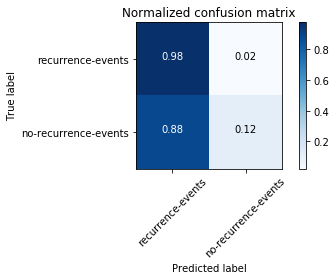

set(['recurrence-events', 'no-recurrence-events'])
                      precision    recall  f1-score   support

   recurrence-events       0.76      0.91      0.83        94
no-recurrence-events       0.50      0.23      0.31        35

           micro avg       0.73      0.73      0.73       129
           macro avg       0.63      0.57      0.57       129
        weighted avg       0.69      0.73      0.69       129

accuracy:  0.7286821705426356


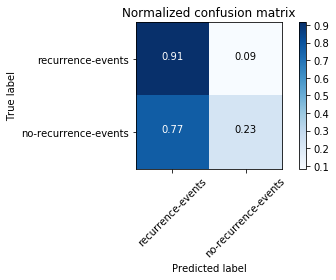

set(['recurrence-events', 'no-recurrence-events'])
                      precision    recall  f1-score   support

   recurrence-events       0.70      0.97      0.81        90
no-recurrence-events       0.40      0.05      0.09        39

           micro avg       0.69      0.69      0.69       129
           macro avg       0.55      0.51      0.45       129
        weighted avg       0.61      0.69      0.59       129

accuracy:  0.689922480620155


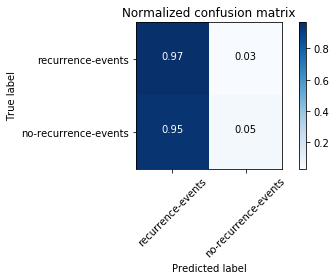

set(['recurrence-events', 'no-recurrence-events'])
                      precision    recall  f1-score   support

   recurrence-events       0.70      0.95      0.81        87
no-recurrence-events       0.60      0.14      0.23        42

           micro avg       0.69      0.69      0.69       129
           macro avg       0.65      0.55      0.52       129
        weighted avg       0.67      0.69      0.62       129

accuracy:  0.689922480620155


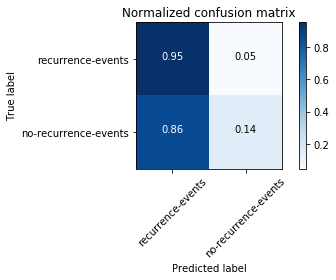

set(['recurrence-events', 'no-recurrence-events'])
                      precision    recall  f1-score   support

   recurrence-events       0.79      0.95      0.86        97
no-recurrence-events       0.58      0.22      0.32        32

           micro avg       0.77      0.77      0.77       129
           macro avg       0.68      0.58      0.59       129
        weighted avg       0.74      0.77      0.73       129

accuracy:  0.7674418604651163


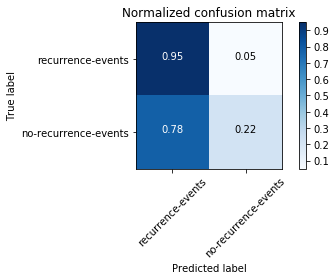

In [24]:
acc.append("Minkowski 15")
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=15, algorithm = 'auto', metric = 'minkowski')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        print "accuracy: ", accuracy_score(y_test, predicted)
        acc.append(accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

                      precision    recall  f1-score   support

   recurrence-events       0.74      0.98      0.84        92
no-recurrence-events       0.71      0.14      0.23        37

           micro avg       0.74      0.74      0.74       129
           macro avg       0.73      0.56      0.53       129
        weighted avg       0.73      0.74      0.67       129

accuracy:  0.7364341085271318


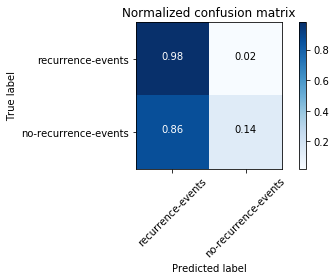

                      precision    recall  f1-score   support

   recurrence-events       0.73      0.98      0.83        92
no-recurrence-events       0.60      0.08      0.14        37

           micro avg       0.72      0.72      0.72       129
           macro avg       0.66      0.53      0.49       129
        weighted avg       0.69      0.72      0.64       129

accuracy:  0.7209302325581395


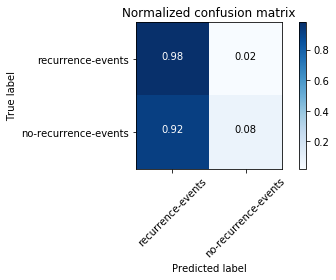

                      precision    recall  f1-score   support

   recurrence-events       0.75      0.98      0.85        94
no-recurrence-events       0.71      0.14      0.24        35

           micro avg       0.75      0.75      0.75       129
           macro avg       0.73      0.56      0.54       129
        weighted avg       0.74      0.75      0.69       129

accuracy:  0.751937984496124


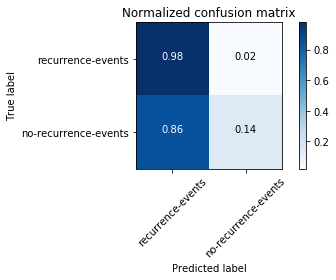

                      precision    recall  f1-score   support

   recurrence-events       0.74      0.99      0.84        90
no-recurrence-events       0.88      0.18      0.30        39

           micro avg       0.74      0.74      0.74       129
           macro avg       0.81      0.58      0.57       129
        weighted avg       0.78      0.74      0.68       129

accuracy:  0.7441860465116279


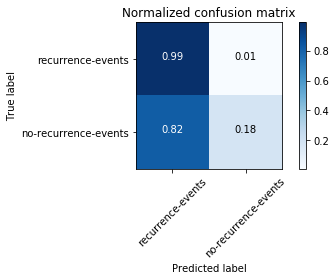

                      precision    recall  f1-score   support

   recurrence-events       0.69      0.95      0.80        88
no-recurrence-events       0.50      0.10      0.16        41

           micro avg       0.68      0.68      0.68       129
           macro avg       0.60      0.53      0.48       129
        weighted avg       0.63      0.68      0.60       129

accuracy:  0.6821705426356589


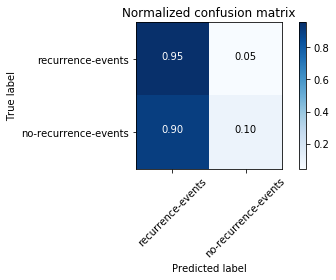

                      precision    recall  f1-score   support

   recurrence-events       0.79      0.96      0.87        96
no-recurrence-events       0.69      0.27      0.39        33

           micro avg       0.78      0.78      0.78       129
           macro avg       0.74      0.62      0.63       129
        weighted avg       0.77      0.78      0.75       129

accuracy:  0.7829457364341085


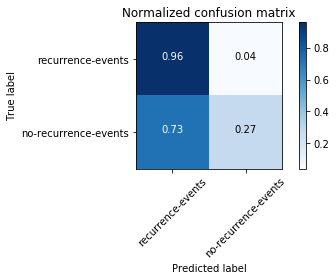

                      precision    recall  f1-score   support

   recurrence-events       0.77      0.96      0.85        94
no-recurrence-events       0.67      0.23      0.34        35

           micro avg       0.76      0.76      0.76       129
           macro avg       0.72      0.59      0.60       129
        weighted avg       0.74      0.76      0.71       129

accuracy:  0.7596899224806202


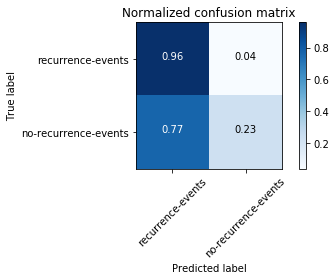

                      precision    recall  f1-score   support

   recurrence-events       0.71      0.99      0.83        90
no-recurrence-events       0.75      0.08      0.14        39

           micro avg       0.71      0.71      0.71       129
           macro avg       0.73      0.53      0.48       129
        weighted avg       0.72      0.71      0.62       129

accuracy:  0.7131782945736435


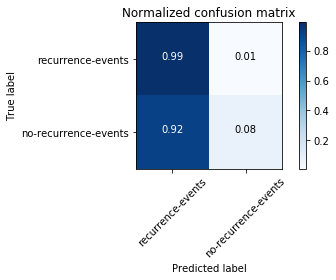

                      precision    recall  f1-score   support

   recurrence-events       0.73      0.98      0.84        91
no-recurrence-events       0.71      0.13      0.22        38

           micro avg       0.73      0.73      0.73       129
           macro avg       0.72      0.55      0.53       129
        weighted avg       0.73      0.73      0.65       129

accuracy:  0.7286821705426356


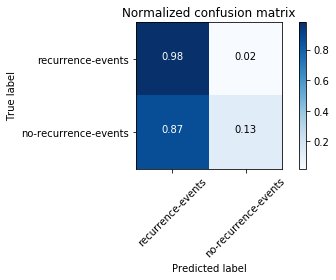

                      precision    recall  f1-score   support

   recurrence-events       0.74      0.97      0.84        93
no-recurrence-events       0.62      0.14      0.23        36

           micro avg       0.74      0.74      0.74       129
           macro avg       0.68      0.55      0.53       129
        weighted avg       0.71      0.74      0.67       129

accuracy:  0.7364341085271318


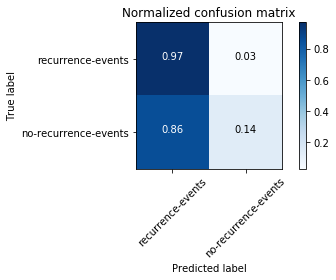

In [25]:
acc.append("Minkowski 20")
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=20, algorithm = 'auto', metric = 'minkowski')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        print "accuracy: ", accuracy_score(y_test, predicted)
        acc.append(accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

                      precision    recall  f1-score   support

   recurrence-events       0.75      0.99      0.85        95
no-recurrence-events       0.67      0.06      0.11        34

           micro avg       0.74      0.74      0.74       129
           macro avg       0.71      0.52      0.48       129
        weighted avg       0.73      0.74      0.65       129

accuracy:  0.7441860465116279


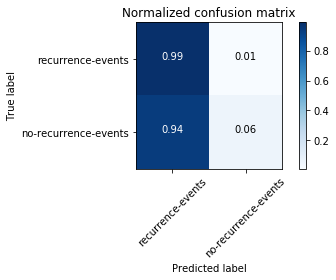

                      precision    recall  f1-score   support

   recurrence-events       0.70      1.00      0.82        89
no-recurrence-events       1.00      0.05      0.10        40

           micro avg       0.71      0.71      0.71       129
           macro avg       0.85      0.53      0.46       129
        weighted avg       0.79      0.71      0.60       129

accuracy:  0.7054263565891473


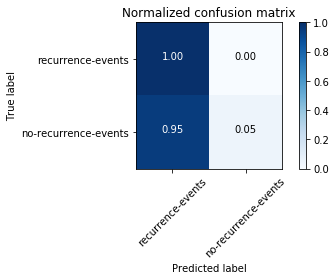

                      precision    recall  f1-score   support

   recurrence-events       0.66      1.00      0.80        85
no-recurrence-events       1.00      0.02      0.04        44

           micro avg       0.67      0.67      0.67       129
           macro avg       0.83      0.51      0.42       129
        weighted avg       0.78      0.67      0.54       129

accuracy:  0.6666666666666666


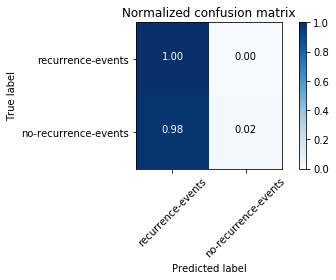

                      precision    recall  f1-score   support

   recurrence-events       0.80      0.98      0.88        99
no-recurrence-events       0.71      0.17      0.27        30

           micro avg       0.79      0.79      0.79       129
           macro avg       0.75      0.57      0.57       129
        weighted avg       0.78      0.79      0.74       129

accuracy:  0.7906976744186046


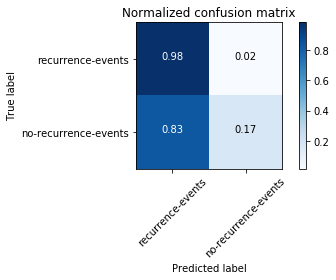

                      precision    recall  f1-score   support

   recurrence-events       0.76      0.98      0.86        96
no-recurrence-events       0.67      0.12      0.21        33

           micro avg       0.76      0.76      0.76       129
           macro avg       0.72      0.55      0.53       129
        weighted avg       0.74      0.76      0.69       129

accuracy:  0.7596899224806202


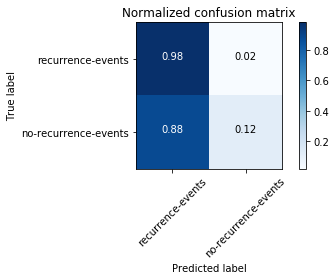

                      precision    recall  f1-score   support

   recurrence-events       0.68      1.00      0.81        88
no-recurrence-events       0.00      0.00      0.00        41

           micro avg       0.68      0.68      0.68       129
           macro avg       0.34      0.50      0.41       129
        weighted avg       0.47      0.68      0.55       129

accuracy:  0.6821705426356589


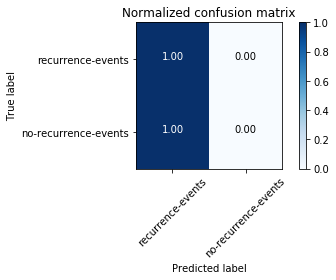

                      precision    recall  f1-score   support

   recurrence-events       0.76      1.00      0.86        94
no-recurrence-events       1.00      0.14      0.25        35

           micro avg       0.77      0.77      0.77       129
           macro avg       0.88      0.57      0.56       129
        weighted avg       0.82      0.77      0.70       129

accuracy:  0.7674418604651163


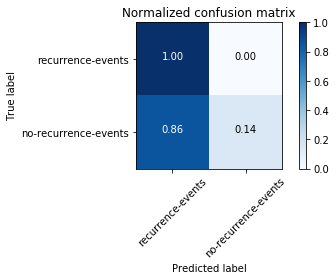

                      precision    recall  f1-score   support

   recurrence-events       0.71      1.00      0.83        90
no-recurrence-events       1.00      0.05      0.10        39

           micro avg       0.71      0.71      0.71       129
           macro avg       0.85      0.53      0.46       129
        weighted avg       0.80      0.71      0.61       129

accuracy:  0.7131782945736435


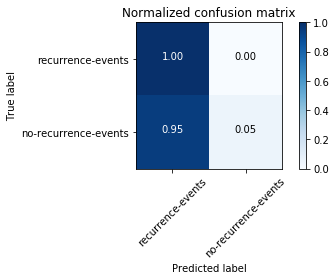

                      precision    recall  f1-score   support

   recurrence-events       0.77      0.97      0.86        95
no-recurrence-events       0.70      0.21      0.32        34

           micro avg       0.77      0.77      0.77       129
           macro avg       0.74      0.59      0.59       129
        weighted avg       0.75      0.77      0.72       129

accuracy:  0.7674418604651163


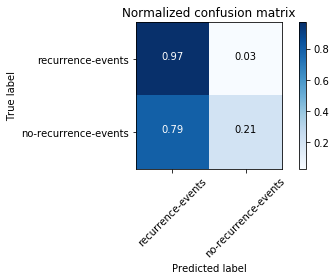

                      precision    recall  f1-score   support

   recurrence-events       0.69      1.00      0.82        89
no-recurrence-events       0.00      0.00      0.00        40

           micro avg       0.69      0.69      0.69       129
           macro avg       0.34      0.50      0.41       129
        weighted avg       0.48      0.69      0.56       129

accuracy:  0.689922480620155


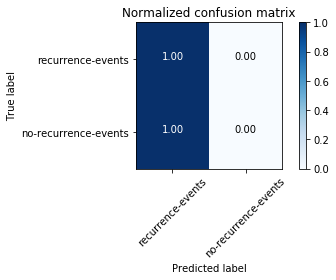

In [26]:
acc.append("Minkowski 30")
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=30, algorithm = 'auto', metric = 'minkowski')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        print "accuracy: ", accuracy_score(y_test, predicted)
        acc.append(accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

                      precision    recall  f1-score   support

   recurrence-events       0.73      1.00      0.84        94
no-recurrence-events       0.00      0.00      0.00        35

           micro avg       0.73      0.73      0.73       129
           macro avg       0.36      0.50      0.42       129
        weighted avg       0.53      0.73      0.61       129

accuracy:  0.7286821705426356


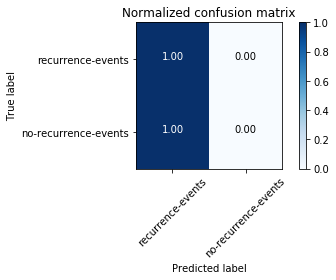

                      precision    recall  f1-score   support

   recurrence-events       0.70      1.00      0.82        90
no-recurrence-events       0.00      0.00      0.00        39

           micro avg       0.70      0.70      0.70       129
           macro avg       0.35      0.50      0.41       129
        weighted avg       0.49      0.70      0.57       129

accuracy:  0.6976744186046512


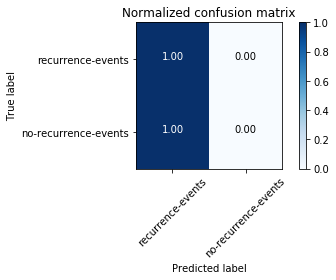

                      precision    recall  f1-score   support

   recurrence-events       0.67      1.00      0.80        86
no-recurrence-events       0.00      0.00      0.00        43

           micro avg       0.67      0.67      0.67       129
           macro avg       0.33      0.50      0.40       129
        weighted avg       0.44      0.67      0.53       129

accuracy:  0.6666666666666666


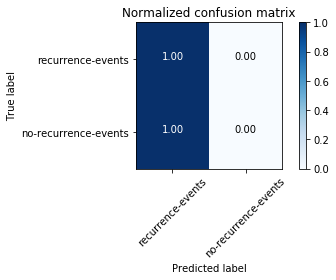

                      precision    recall  f1-score   support

   recurrence-events       0.79      0.97      0.87        98
no-recurrence-events       0.67      0.19      0.30        31

           micro avg       0.78      0.78      0.78       129
           macro avg       0.73      0.58      0.59       129
        weighted avg       0.76      0.78      0.73       129

accuracy:  0.7829457364341085


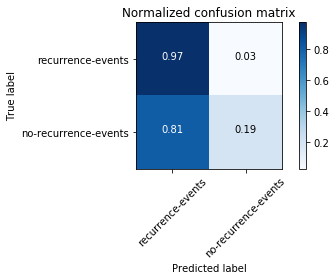

                      precision    recall  f1-score   support

   recurrence-events       0.73      1.00      0.84        93
no-recurrence-events       1.00      0.03      0.05        36

           micro avg       0.73      0.73      0.73       129
           macro avg       0.86      0.51      0.45       129
        weighted avg       0.80      0.73      0.62       129

accuracy:  0.7286821705426356


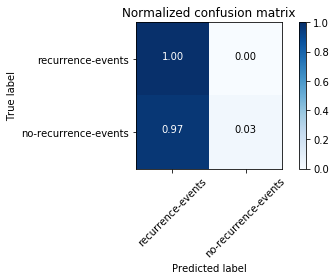

                      precision    recall  f1-score   support

   recurrence-events       0.71      1.00      0.83        91
no-recurrence-events       0.00      0.00      0.00        38

           micro avg       0.71      0.71      0.71       129
           macro avg       0.35      0.50      0.41       129
        weighted avg       0.50      0.71      0.58       129

accuracy:  0.7054263565891473


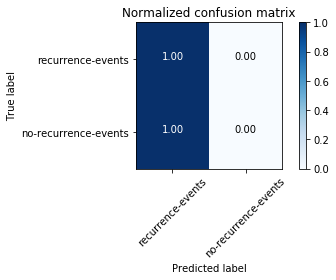

                      precision    recall  f1-score   support

   recurrence-events       0.76      1.00      0.86        96
no-recurrence-events       1.00      0.06      0.11        33

           micro avg       0.76      0.76      0.76       129
           macro avg       0.88      0.53      0.49       129
        weighted avg       0.82      0.76      0.67       129

accuracy:  0.7596899224806202


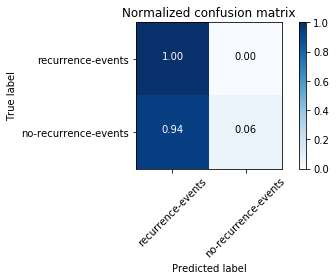

                      precision    recall  f1-score   support

   recurrence-events       0.68      1.00      0.81        88
no-recurrence-events       0.00      0.00      0.00        41

           micro avg       0.68      0.68      0.68       129
           macro avg       0.34      0.50      0.41       129
        weighted avg       0.47      0.68      0.55       129

accuracy:  0.6821705426356589


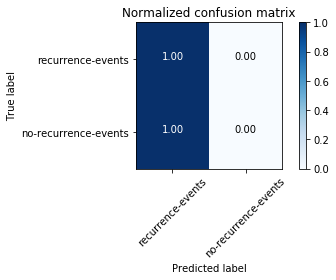

                      precision    recall  f1-score   support

   recurrence-events       0.69      1.00      0.82        89
no-recurrence-events       0.00      0.00      0.00        40

           micro avg       0.69      0.69      0.69       129
           macro avg       0.34      0.50      0.41       129
        weighted avg       0.48      0.69      0.56       129

accuracy:  0.689922480620155


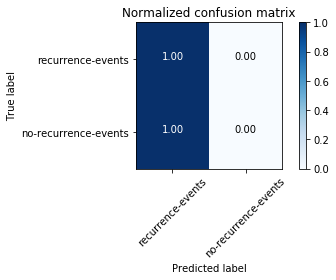

                      precision    recall  f1-score   support

   recurrence-events       0.75      0.98      0.85        95
no-recurrence-events       0.60      0.09      0.15        34

           micro avg       0.74      0.74      0.74       129
           macro avg       0.68      0.53      0.50       129
        weighted avg       0.71      0.74      0.67       129

accuracy:  0.7441860465116279


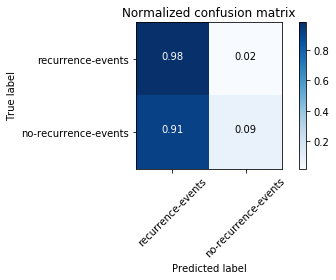

In [27]:
acc.append("Minkowski 50")
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=50, algorithm = 'auto', metric = 'minkowski')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        print "accuracy: ", accuracy_score(y_test, predicted)
        acc.append(accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

                      precision    recall  f1-score   support

   recurrence-events       0.71      1.00      0.83        91
no-recurrence-events       0.00      0.00      0.00        38

           micro avg       0.71      0.71      0.71       129
           macro avg       0.35      0.50      0.41       129
        weighted avg       0.50      0.71      0.58       129

accuracy:  0.7054263565891473


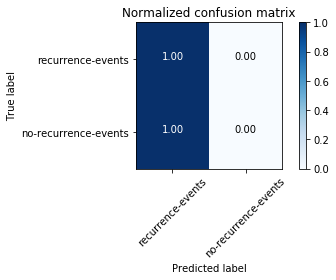

                      precision    recall  f1-score   support

   recurrence-events       0.72      1.00      0.84        93
no-recurrence-events       0.00      0.00      0.00        36

           micro avg       0.72      0.72      0.72       129
           macro avg       0.36      0.50      0.42       129
        weighted avg       0.52      0.72      0.60       129

accuracy:  0.7209302325581395


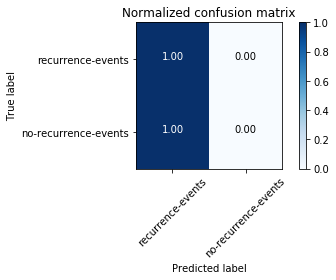

                      precision    recall  f1-score   support

   recurrence-events       0.70      1.00      0.82        90
no-recurrence-events       0.00      0.00      0.00        39

           micro avg       0.70      0.70      0.70       129
           macro avg       0.35      0.50      0.41       129
        weighted avg       0.49      0.70      0.57       129

accuracy:  0.6976744186046512


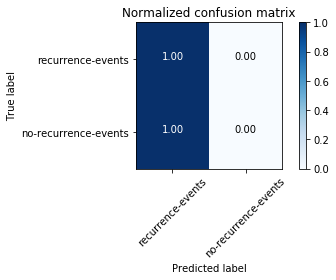

                      precision    recall  f1-score   support

   recurrence-events       0.73      1.00      0.84        94
no-recurrence-events       0.00      0.00      0.00        35

           micro avg       0.73      0.73      0.73       129
           macro avg       0.36      0.50      0.42       129
        weighted avg       0.53      0.73      0.61       129

accuracy:  0.7286821705426356


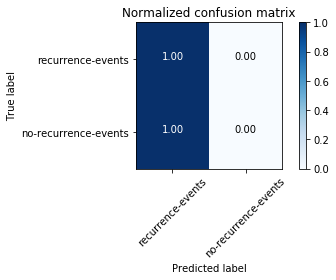

                      precision    recall  f1-score   support

   recurrence-events       0.71      1.00      0.83        91
no-recurrence-events       0.00      0.00      0.00        38

           micro avg       0.71      0.71      0.71       129
           macro avg       0.35      0.50      0.41       129
        weighted avg       0.50      0.71      0.58       129

accuracy:  0.7054263565891473


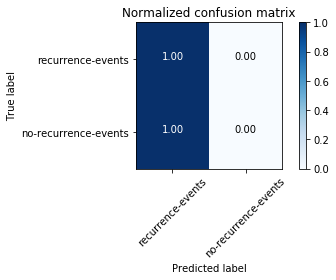

                      precision    recall  f1-score   support

   recurrence-events       0.72      1.00      0.84        93
no-recurrence-events       0.00      0.00      0.00        36

           micro avg       0.72      0.72      0.72       129
           macro avg       0.36      0.50      0.42       129
        weighted avg       0.52      0.72      0.60       129

accuracy:  0.7209302325581395


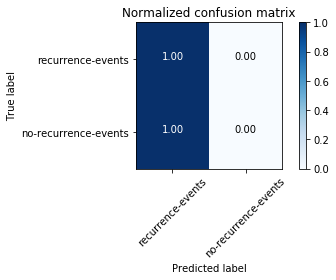

                      precision    recall  f1-score   support

   recurrence-events       0.75      1.00      0.86        97
no-recurrence-events       0.00      0.00      0.00        32

           micro avg       0.75      0.75      0.75       129
           macro avg       0.38      0.50      0.43       129
        weighted avg       0.57      0.75      0.65       129

accuracy:  0.751937984496124


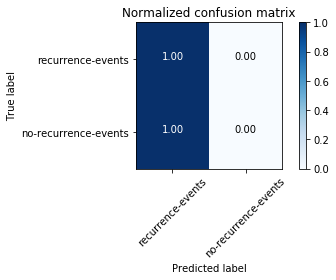

                      precision    recall  f1-score   support

   recurrence-events       0.67      1.00      0.81        87
no-recurrence-events       0.00      0.00      0.00        42

           micro avg       0.67      0.67      0.67       129
           macro avg       0.34      0.50      0.40       129
        weighted avg       0.45      0.67      0.54       129

accuracy:  0.6744186046511628


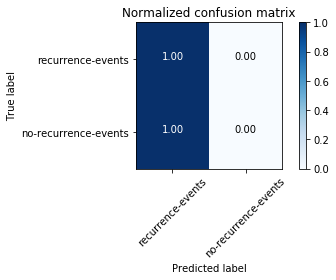

                      precision    recall  f1-score   support

   recurrence-events       0.72      1.00      0.84        93
no-recurrence-events       0.00      0.00      0.00        36

           micro avg       0.72      0.72      0.72       129
           macro avg       0.36      0.50      0.42       129
        weighted avg       0.52      0.72      0.60       129

accuracy:  0.7209302325581395


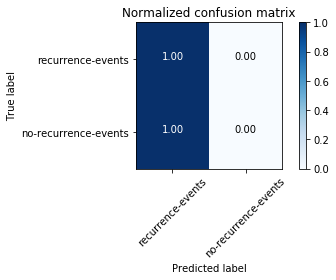

                      precision    recall  f1-score   support

   recurrence-events       0.71      1.00      0.83        91
no-recurrence-events       0.00      0.00      0.00        38

           micro avg       0.71      0.71      0.71       129
           macro avg       0.35      0.50      0.41       129
        weighted avg       0.50      0.71      0.58       129

accuracy:  0.7054263565891473


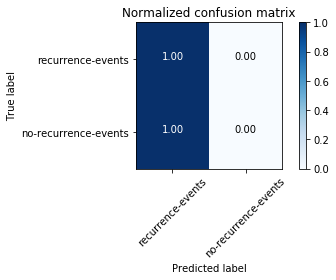

In [28]:
acc.append("Minkowski 100")
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=100, algorithm = 'auto', metric = 'minkowski')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        print "accuracy: ", accuracy_score(y_test, predicted)
        acc.append(accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

In [29]:
print acc


with open("accBreastKNNWithoutNoise.csv", 'wb') as myfile:
    wr = csv.writer(myfile, delimiter='\n')
    wr.writerow(acc)
    #writer.writerow(list_of_emails)
    

['Euclidean 1', 0.6744186046511628, 0.6511627906976745, 0.6434108527131783, 0.6666666666666666, 0.6744186046511628, 0.6821705426356589, 0.6666666666666666, 0.6511627906976745, 0.6821705426356589, 0.6046511627906976, 'Euclidean 5', 0.7054263565891473, 0.6511627906976745, 0.7364341085271318, 0.7054263565891473, 0.7131782945736435, 0.7054263565891473, 0.7286821705426356, 0.6976744186046512, 0.7674418604651163, 0.7209302325581395, 'Euclidean 10', 0.7286821705426356, 0.6976744186046512, 0.7054263565891473, 0.7209302325581395, 0.7131782945736435, 0.7286821705426356, 0.7596899224806202, 0.6666666666666666, 0.7751937984496124, 0.7209302325581395, 'Euclidean 15', 0.7286821705426356, 0.751937984496124, 0.7286821705426356, 0.7441860465116279, 0.7596899224806202, 0.7441860465116279, 0.7751937984496124, 0.6589147286821705, 0.7209302325581395, 0.7441860465116279, 'Euclidean 20', 0.751937984496124, 0.7131782945736435, 0.7054263565891473, 0.7674418604651163, 0.689922480620155, 0.8062015503875969, 0.73